## imports and setup

In [2]:
import numpy as np
import os
import h5py

from utils import find_node_velocity, get_stats, fill_missing, graph_vels, nan_vals

## see if videos improved

In [9]:
coop_dir = '/gpfs/radev/pi/saxena/aj764/Training_COOPERATION/'
redo_dir = coop_dir + 'redo/'
files = os.listdir(redo_dir)

In [10]:
len('NO_FLOW_')

8

In [ ]:
"032824/032824_COOPTRAIN_LARGEARENA_KL001B-KL001Y_Camera1.mp4.predictions.h5"

In [11]:
with h5py.File(redo_dir + 'TEST.h5','r') as f:
    locations = f["tracks"][:].T 
    # find nan values
    intial = nan_vals(locations)
    print(round(intial, 2))
    for rat in range(locations.shape[-1]): # for each rat (not actually necessary, the dims work out without this loop but I don't feel like thinking abt that)
        all_vels = {}
        for node in range(locations.shape[1]): # for each node
            # find the velocities
            all_vels[node] = find_node_velocity(locations[:, node, :,  rat:rat+1])
        
            # get values need to find outliers
            mean, std, low, high = get_stats(all_vels[node])
        
            # if you want to check that these values looks good
            graph_vels(all_vels[node], False)
        
            # replace outliers in locations with nan
            # nan_index = [i for i in range(len(all_vels[node])) if (all_vels[node][i] > high or all_vels[node][i] < low)]
            # for index in nan_index:
            #     locations[index + 1, node, 0, rat], locations[index + 1, node, 0, rat] = np.nan, np.nan
        
            # if you want to check that new locations look good
            test_vels = find_node_velocity(locations[:, node, :])
            graph_vels(test_vels, check=False, old_low=low, old_high=high)

43.46


In [13]:
import matplotlib.pyplot as plt

13.310133428054026 20.994362075581098 -49.672952798689266 76.29321965479733


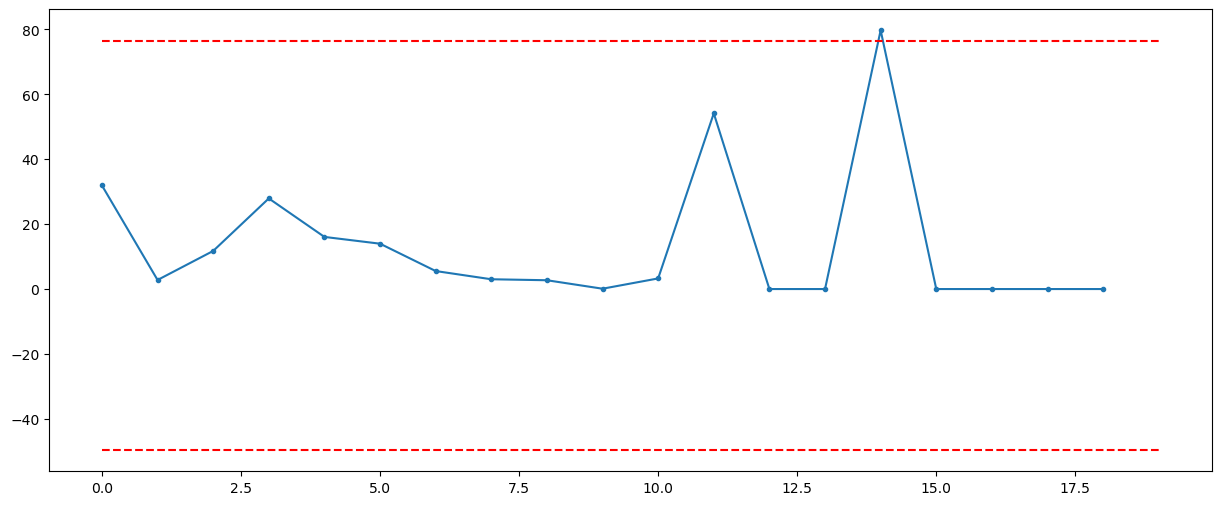

In [14]:
all_vels[1] = find_node_velocity(locations[:20, 1, :,  0])

# get values need to find outliers
mean, std, low, high = get_stats(all_vels[1])

# if you want to check that these values looks good
graph_vels(all_vels[1], True)

In [15]:
all_vels[1][0]

31.918036512104212

In [ ]:
# could we calculate a pairwise matrix?? of the velocity between all of the points and each other?? 
# would that make all this easiter

# OR what if you fill in all of nan values and then see if there are gaps?? what does that look like

In [65]:
def find_node_velocity(node_locs):
    vels = np.zeros((node_locs.shape[0] - 1))
    num_stab = 1**-20
    for j in range(node_locs.shape[0] - 1):
        vel_temp = np.sqrt(np.sum(np.square(node_locs[j] - node_locs[j+1])))
        vels[j] = vel_temp
    # anything that nan is changed to 0 to make my life easier
    vels = [0 if np.isnan(x) else x for x in vels]
    return vels

In [9]:
x = 1000

In [7]:
# with h5py.File('/gpfs/radev/pi/saxena/aj764/PairedTestingSessions/041624_KL001_TimeOut/Tracking/h5/041624_Cam4_TrNum13_IS_KL001Y.predictions.h5') as f:
with h5py.File('/gpfs/radev/pi/saxena/aj764/Training_COOPERATION/032824/Tracking/h5/032824_COOPTRAIN_LARGEARENA_KL001B-KL001Y_Camera1.predictions.h5') as f:
    locations = f["tracks"][:].T 
    # find nan values
    intial = nan_vals(locations)

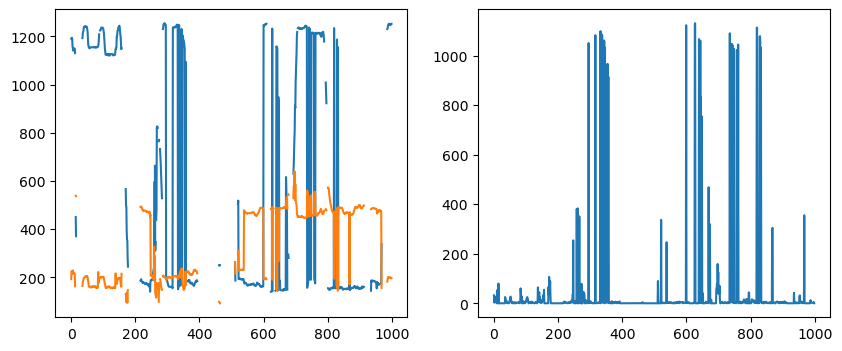

627


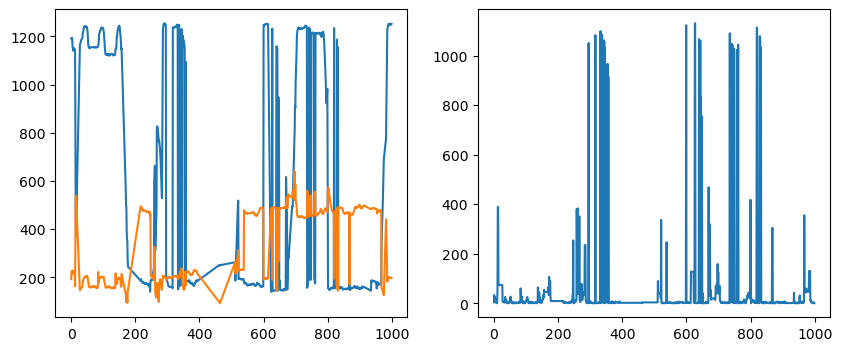

-510.6861889762303 203.75419968677224
599


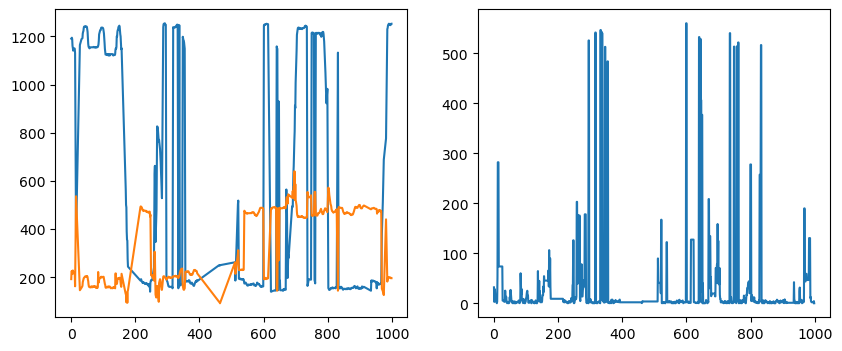

-262.2631534896867 110.37327573908651
600


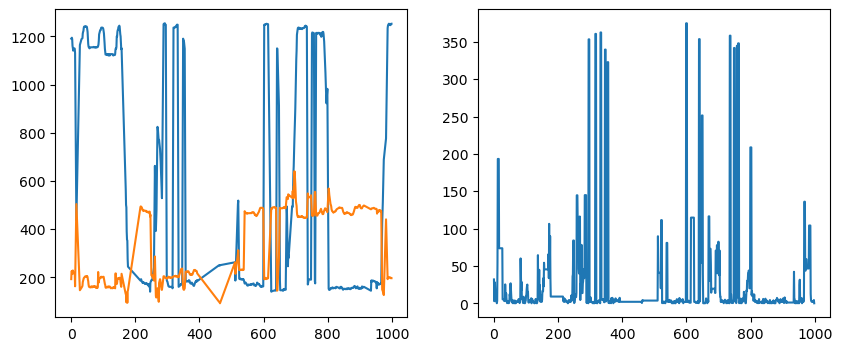

-179.04311206023385 78.26015717396494
599


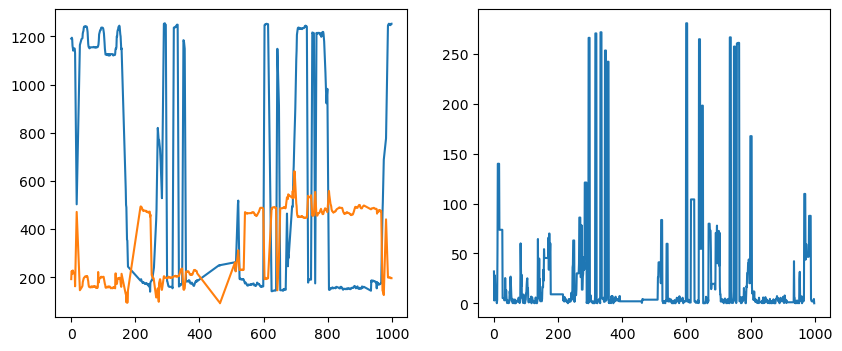

-149.6864767072294 67.82043057653689
602


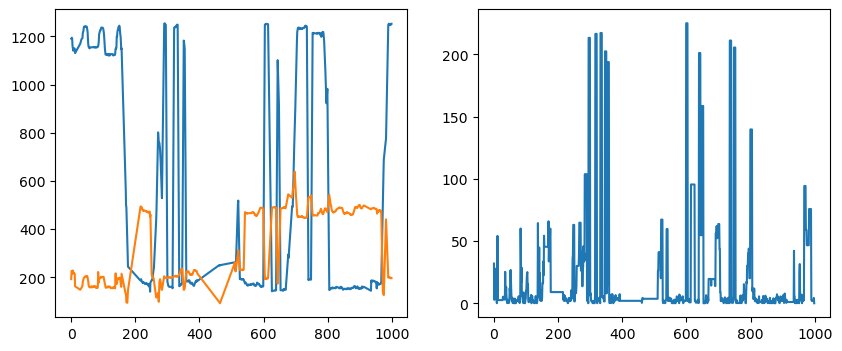

-120.7360425342577 55.339749940506216
599


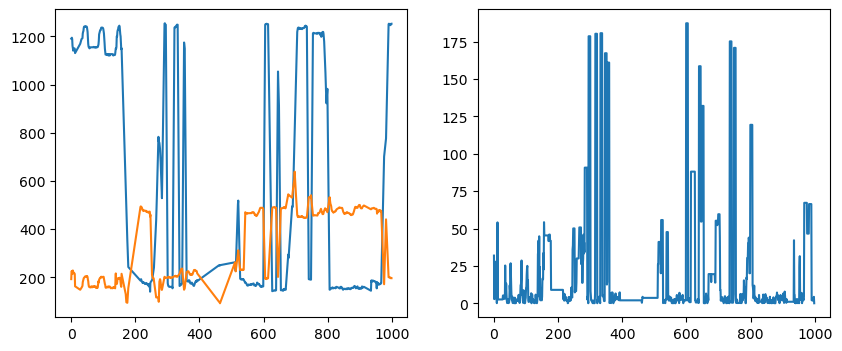

-106.56063682257468 50.336945413833256
604


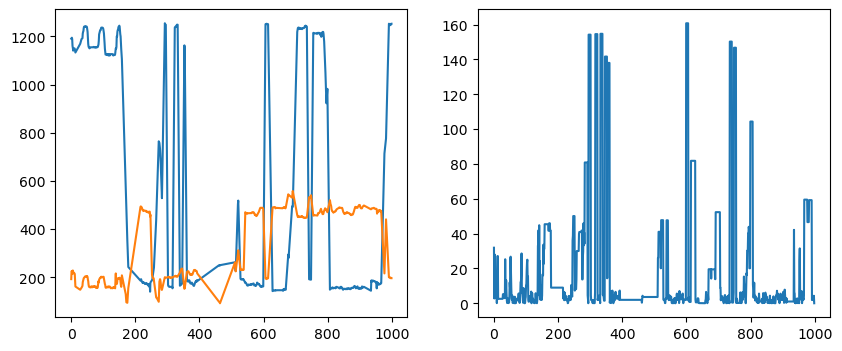

-92.24257491543071 44.13485791145615
599


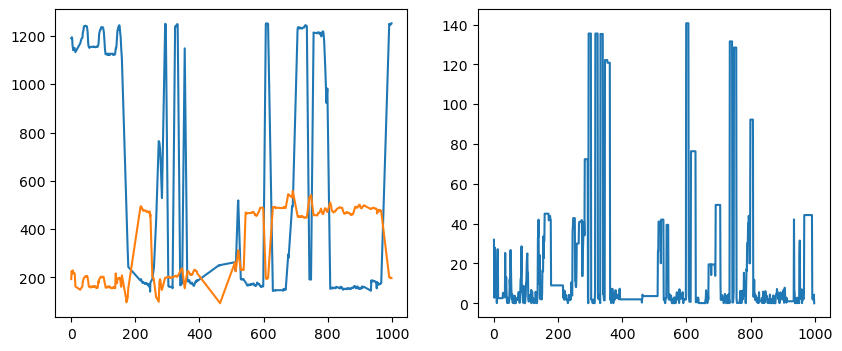

-83.89243004513798 41.126374711975
605


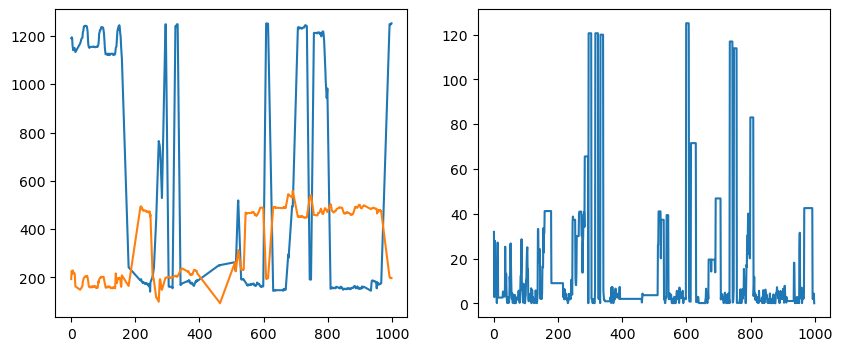

-72.52045031782478 35.95049648599493
608


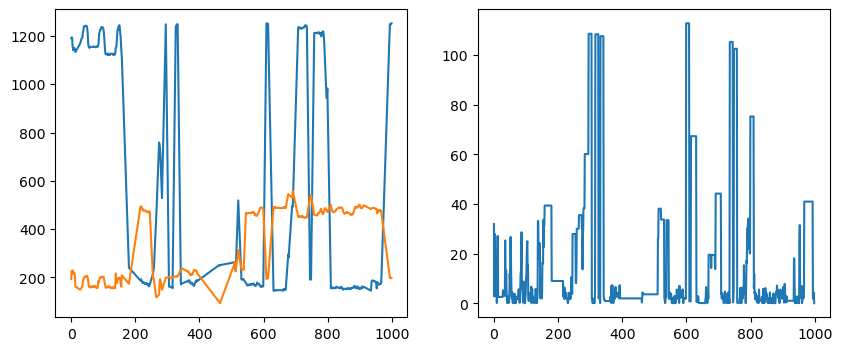

-67.27106946688156 34.103102602817465
607


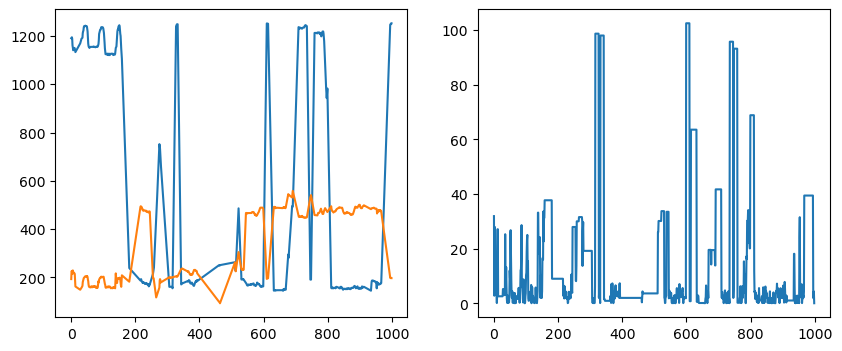

-58.78768329894231 30.225655045271008
601


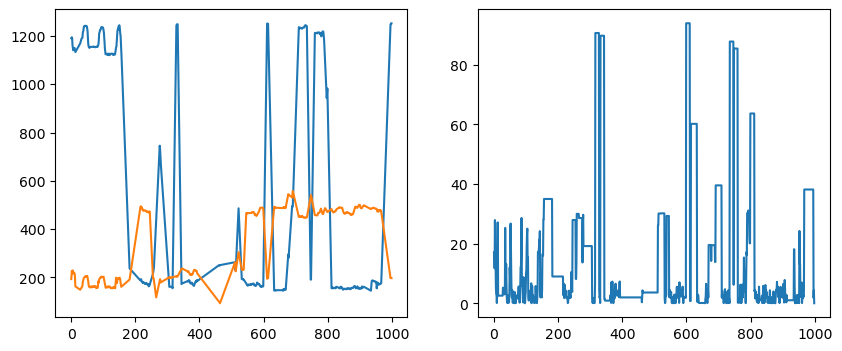

-55.18178728019816 28.933931023648626
602


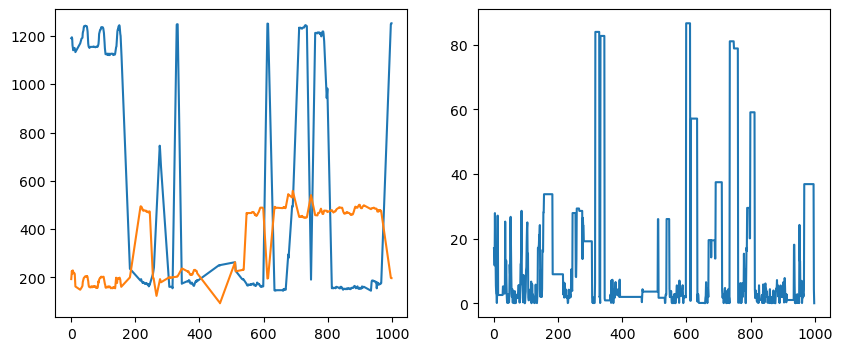

-52.601224263260804 27.68858708275305
603


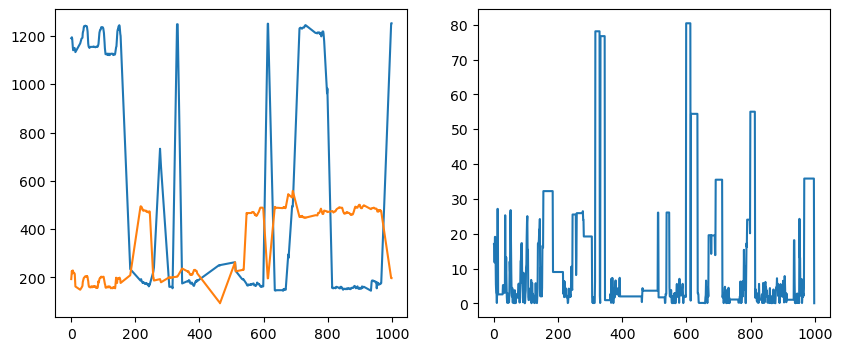

-44.63854935109006 23.582520804197827
613


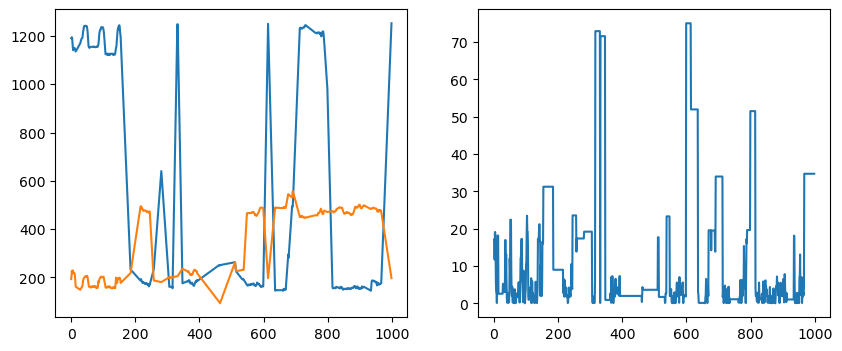

-42.347890158006834 22.628055797546192
316


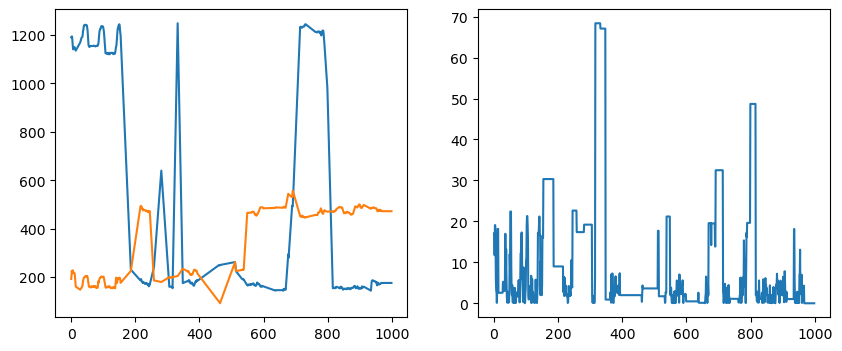

-34.61185861822516 17.79370411709157
789


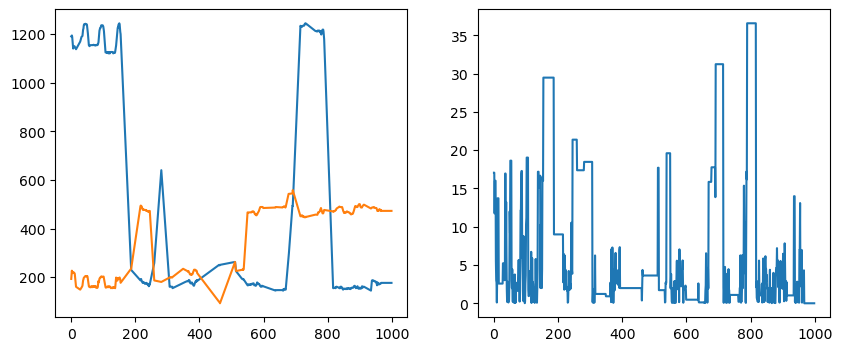

-21.66209533183209 11.995395529124442
788


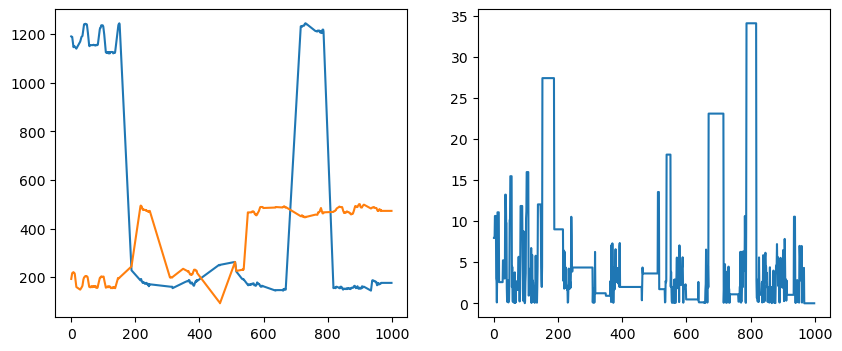

-19.507772013968026 10.588064285796305
787


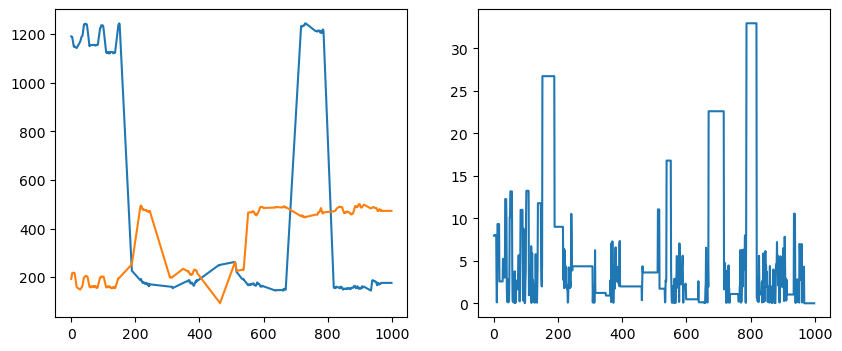

-18.93988691264838 10.381738261831192
787


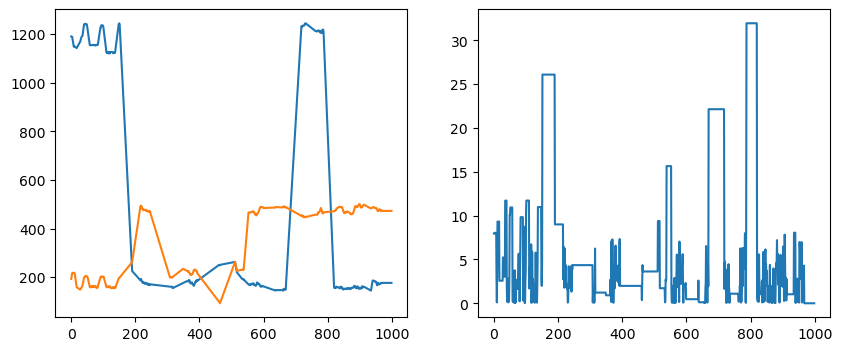

-18.45365707307791 10.190597029831432
788


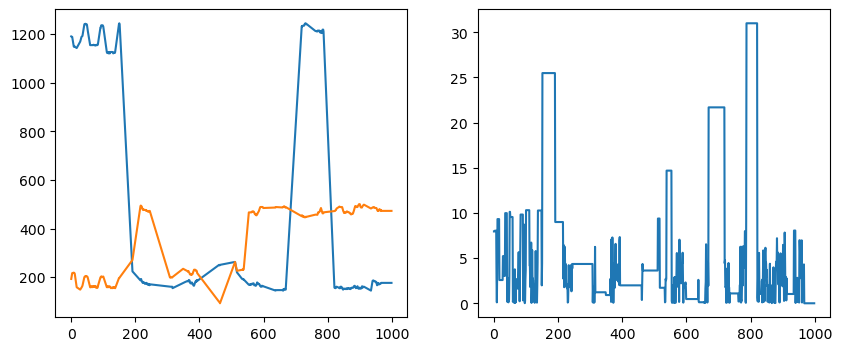

-17.987822960005712 10.0244407080777
787


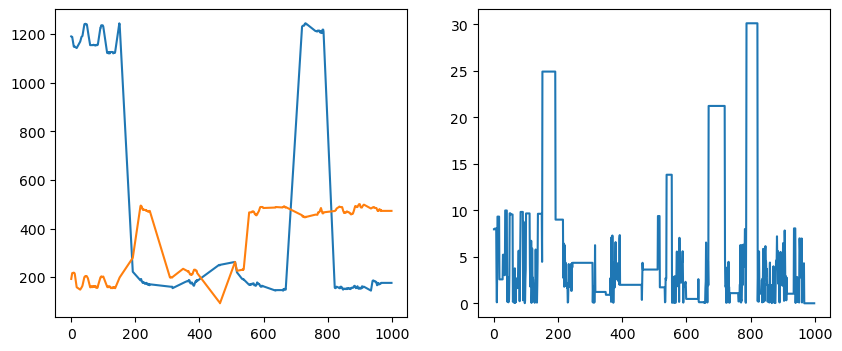

-17.57619735979374 9.87589272223814
787


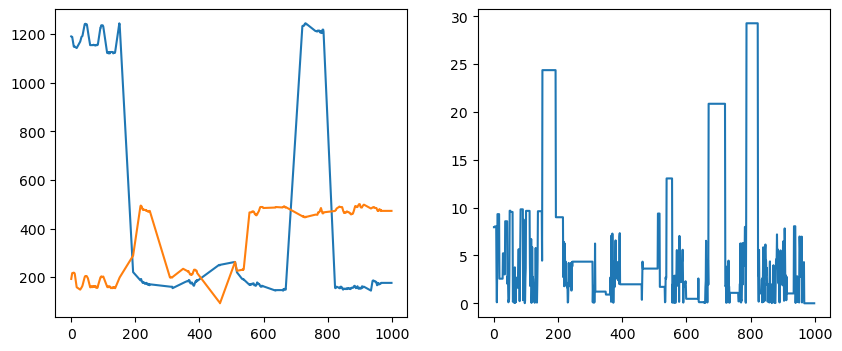

-17.206225938687435 9.746311585040816
787


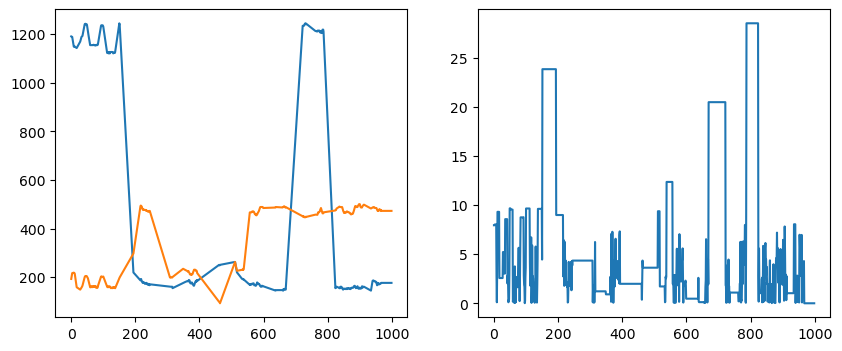

-16.865402677934465 9.62764347021488
788


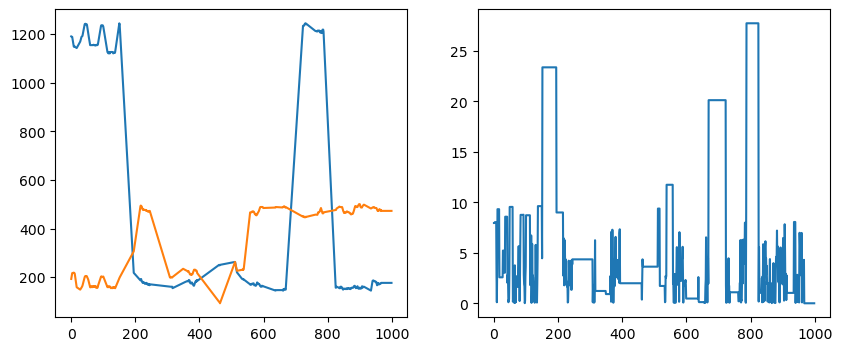

-16.512624527970356 9.495010238510284
788


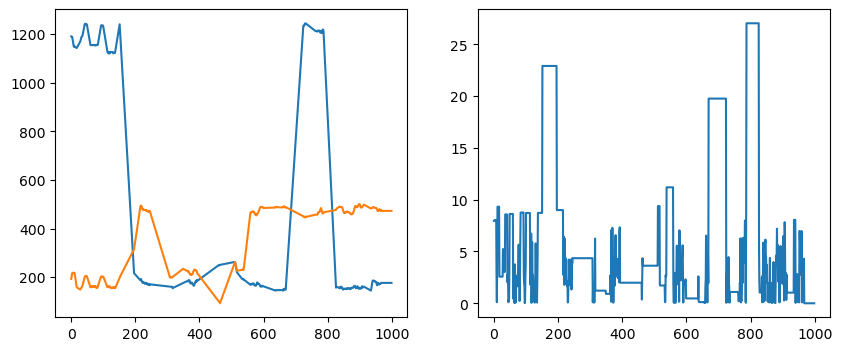

-16.165639086342374 9.36722283183233
787


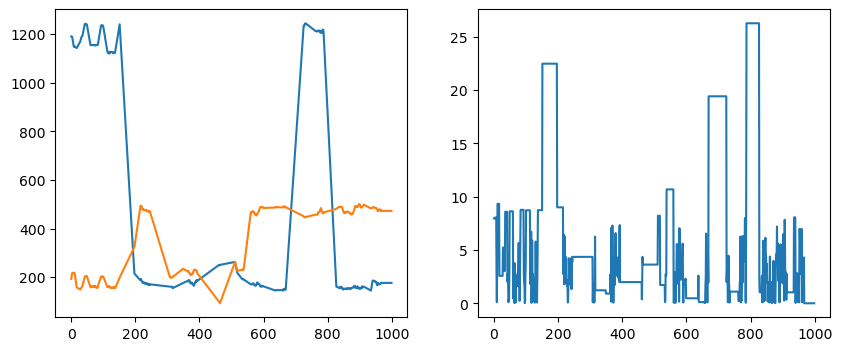

-15.819431112141451 9.239282231028769
787


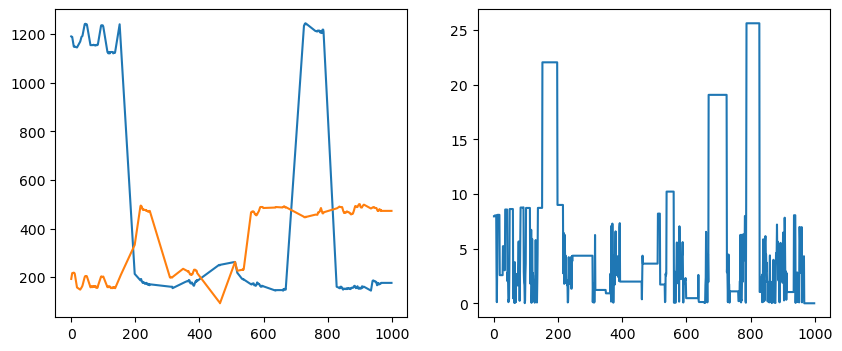

-15.510932543674421 9.128224471605103
787


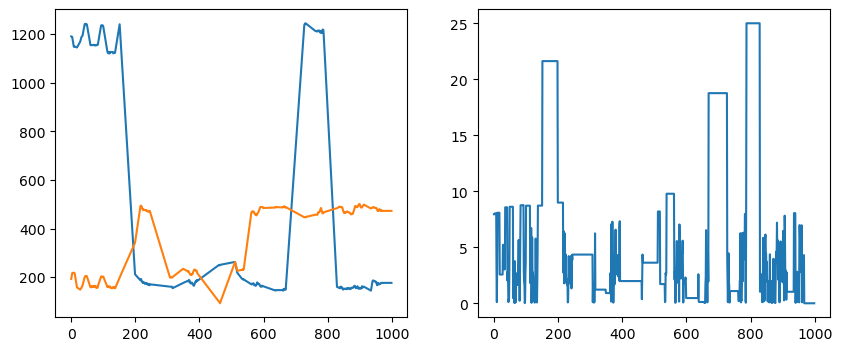

-15.23330931798381 9.03065262912599
787


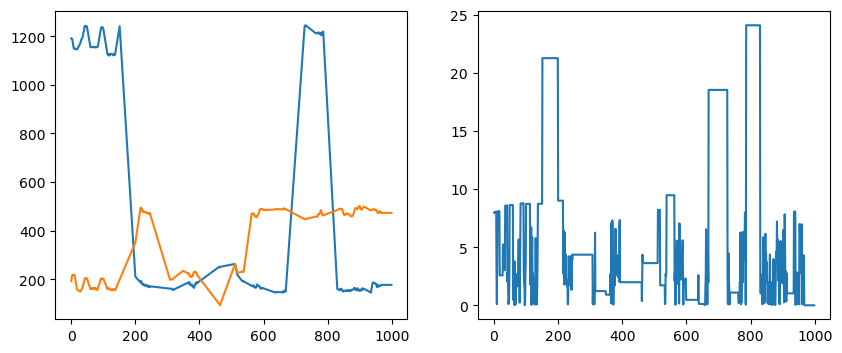

-14.927659473209424 8.922940380700068
786


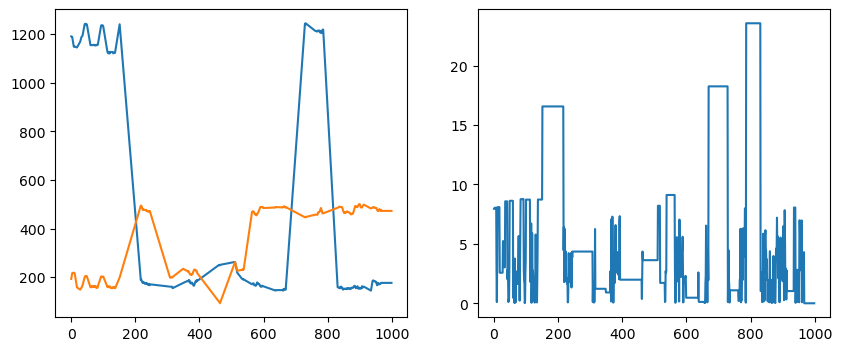

-13.897288543276666 8.514524126129158
831


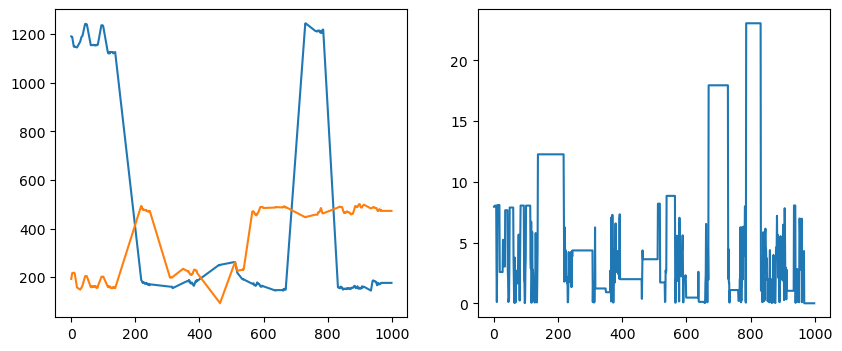

-12.830662340936794 8.003028799758011
787


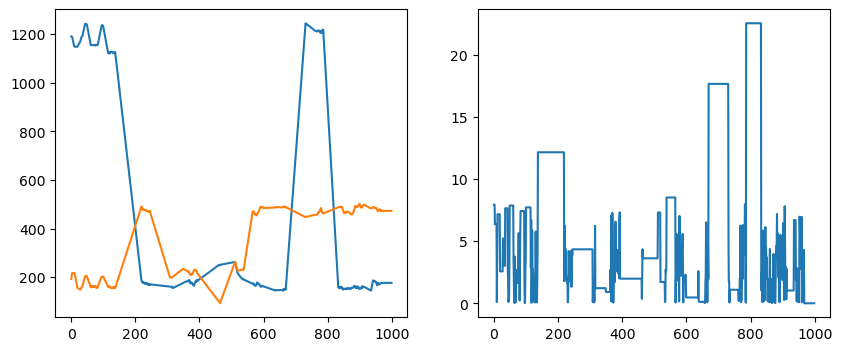

-12.573759815069558 7.910542599751712
833


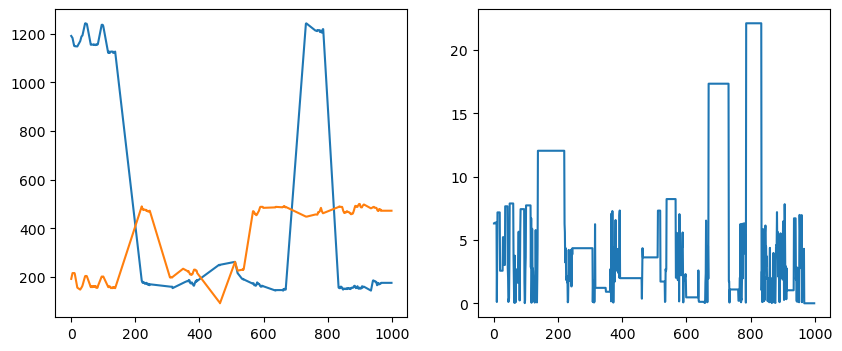

-12.318711035199243 7.816032615222625
786


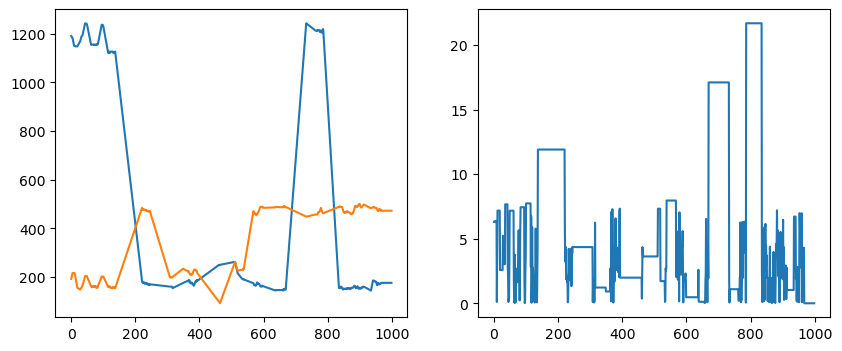

-12.11803090417985 7.7347814284323455
787


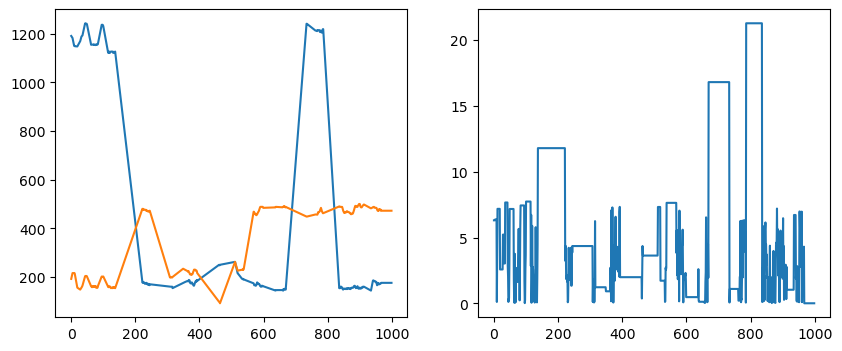

-11.918947777117301 7.660872095224164
793


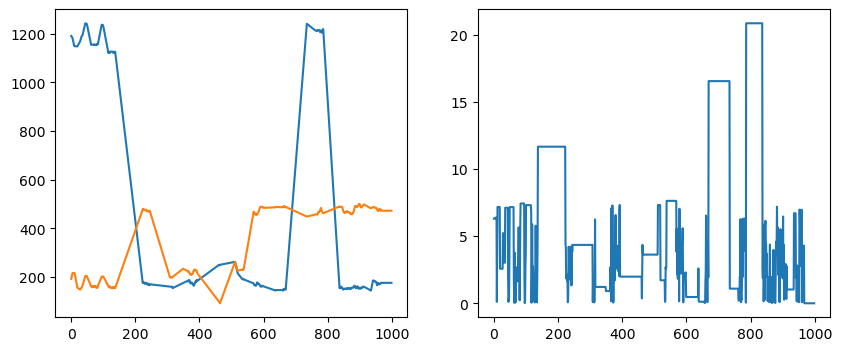

-11.698214692922761 7.584767196211447
786


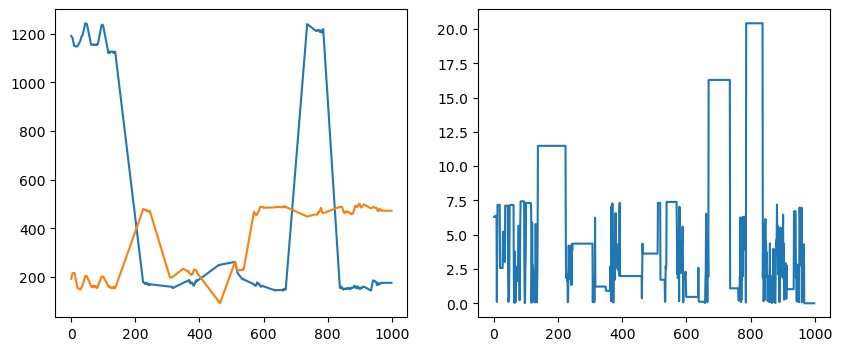

-11.471216537643723 7.496153169603708
837


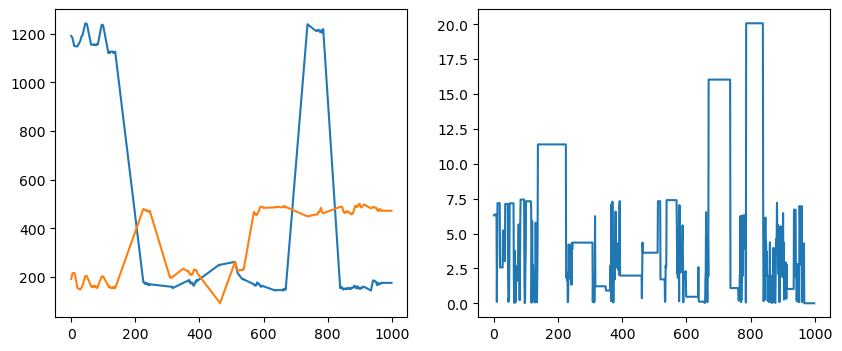

-11.293936287537214 7.434874982646193
790


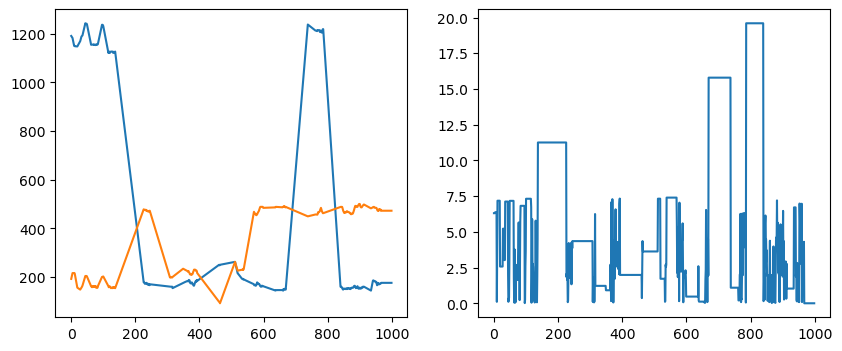

-11.055052034358688 7.342729086390229
786


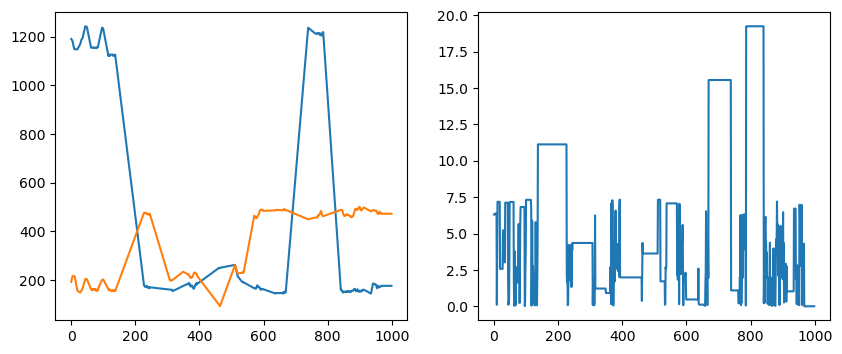

-10.855988828356796 7.267652439638166
786


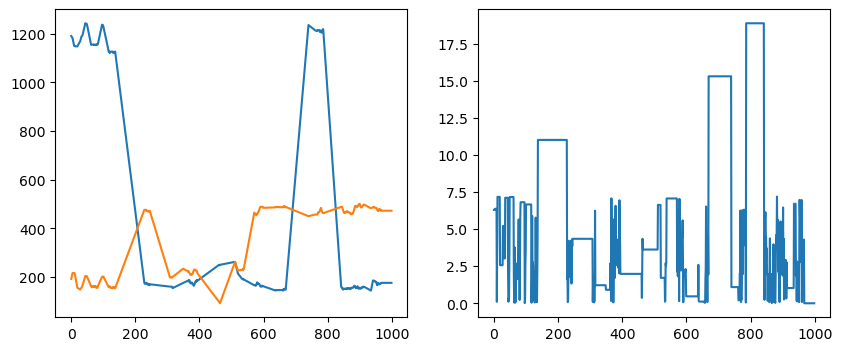

-10.654954542351302 7.190879401145353
788


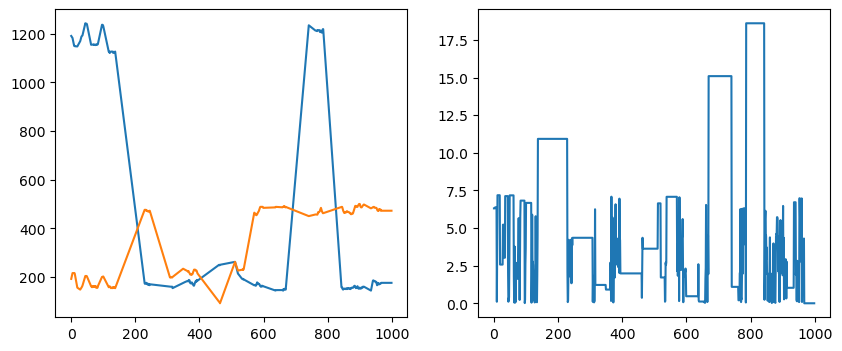

-10.485764693642864 7.132975980002598
809


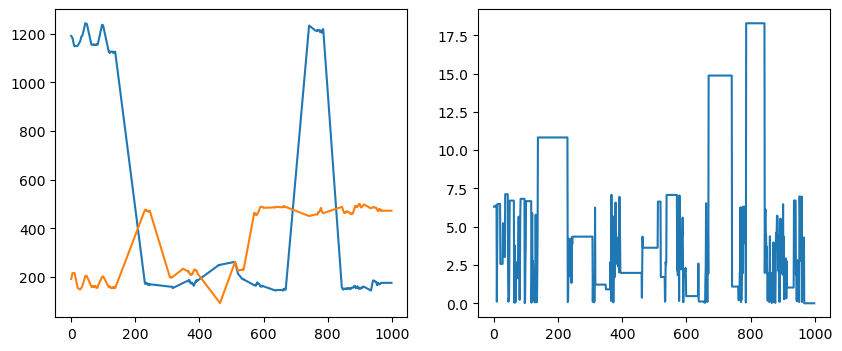

-10.292121125045703 7.064966316060162
801


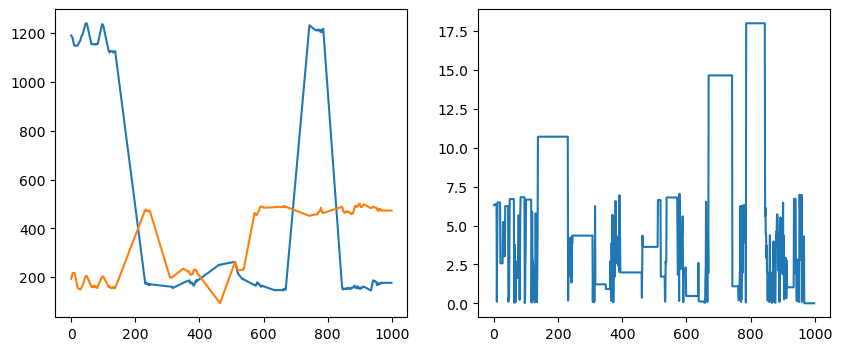

-10.108599490884691 6.995969493007678
787


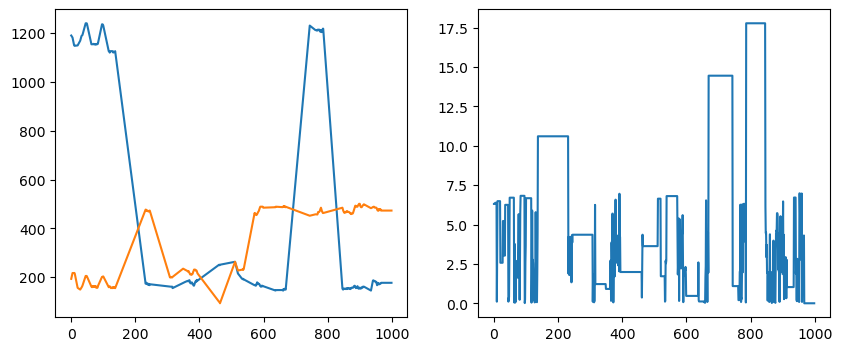

-9.958624813099927 6.943015672328571
786


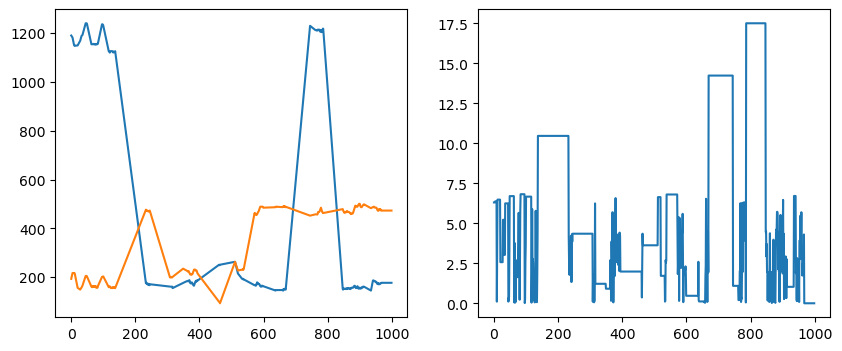

-9.806503648758017 6.878847834784268
789


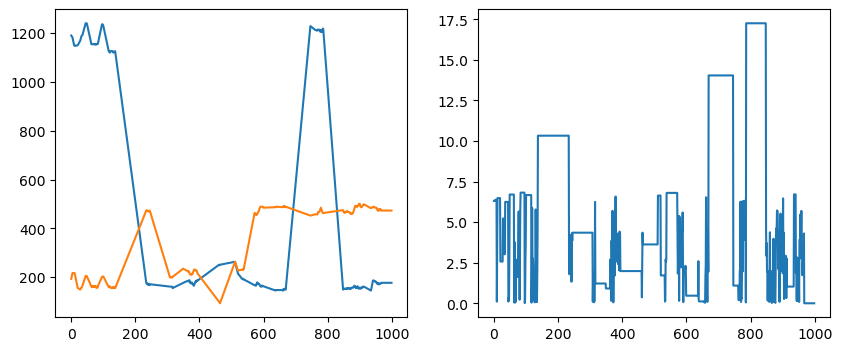

-9.654437415225903 6.820008929731409
788


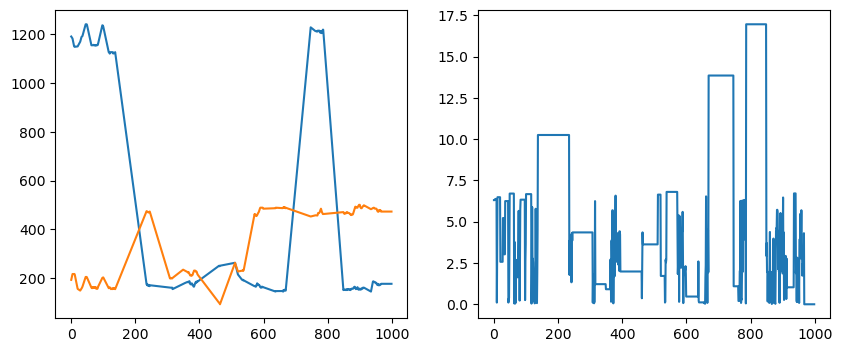

-9.478387821038442 6.755476548320632
786


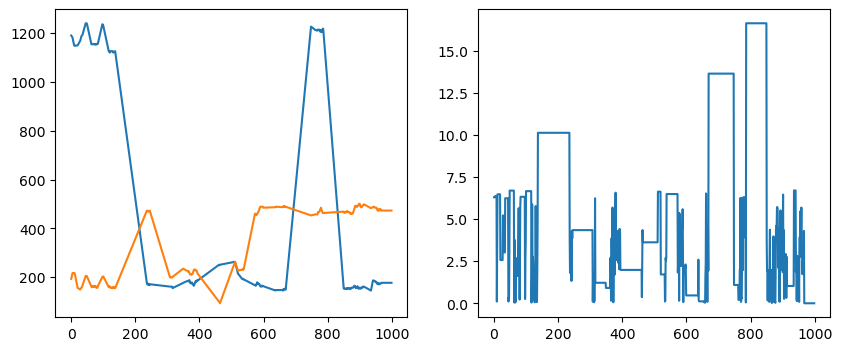

-9.305823890868547 6.686372840456092


In [14]:
new_locations = locations[:x, 1, :, 0]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(locations[:x, 1, 0, 0])
ax[0].plot(locations[:x, 1, 1, 0])
# print(new_locations)
vels = find_node_velocity(new_locations)
# print(vels)
ax[1].plot(vels)
plt.show()

for i in range(50):
    new_locations = fill_missing(new_locations)
    vels = find_node_velocity(new_locations)
    print(np.argmax(vels))
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(new_locations[:x, 0])
    ax[0].plot(new_locations[:x, 1])
    ax[1].plot(vels)
    plt.show()
    # replace outliers in locations with nan
    mean, std, low, high = get_stats(vels)
    high = high / 3
    nan_index = [i for i in range(len(vels)) if (vels[i] > high or vels[i] < low)]
    print(low, high) # this doesn't seems like a tight enough bound... 
    for index in nan_index:
        new_locations[index + 1, 0], new_locations[index + 1, 1] = np.nan, np.nan
    # keeps flattening but at some points is completely flattening out everything... need to find the sweet spot
    # also still want to quantify how big of a problem track switching is...!

    # at some point, will just have to nan out values permentalty if the jump is too big me thinks??

In [15]:
# with h5py.File('/gpfs/radev/pi/saxena/aj764/PairedTestingSessions/041624_KL001_TimeOut/Tracking/h5/041624_Cam4_TrNum13_IS_KL001Y.predictions.h5') as f:
with h5py.File('/gpfs/radev/pi/saxena/aj764/Training_COOPERATION/redo/TEST.h5') as f:
    locations = f["tracks"][:].T 
    # find nan values
    intial = nan_vals(locations)

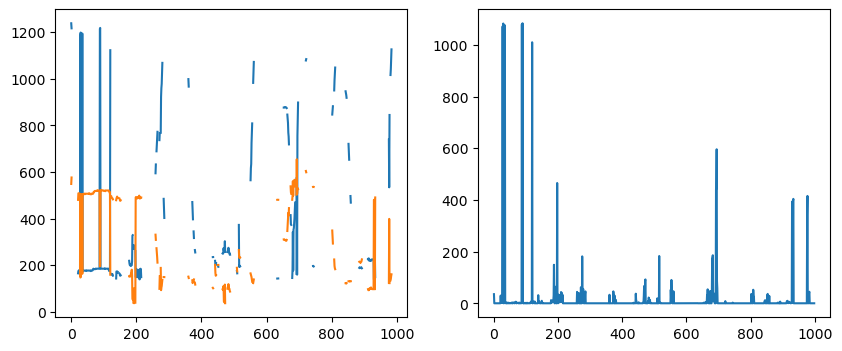

89


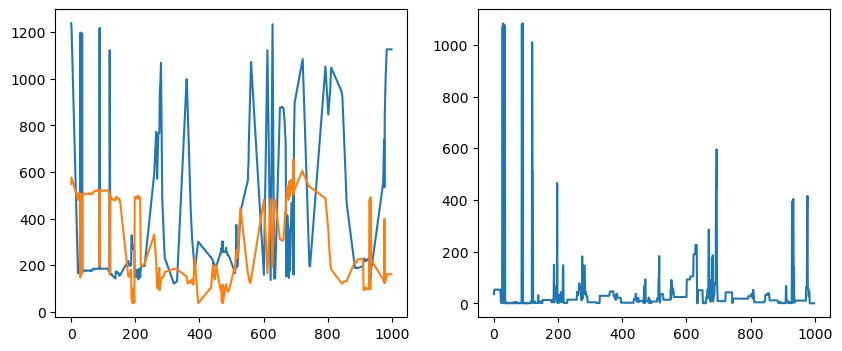

-275.65383738933576 115.57720135304093
89


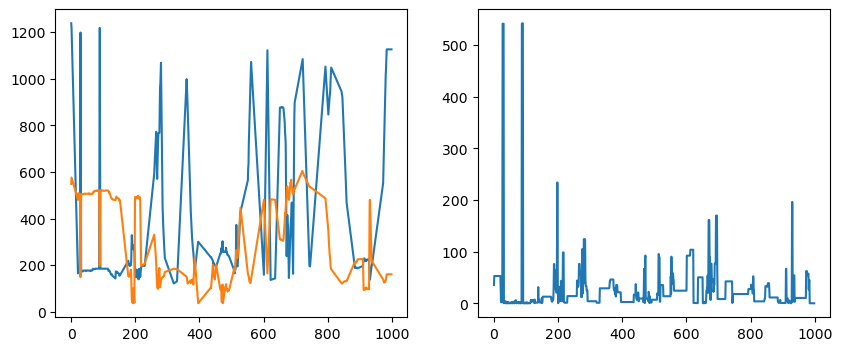

-138.02496237149487 63.47148432731229
197


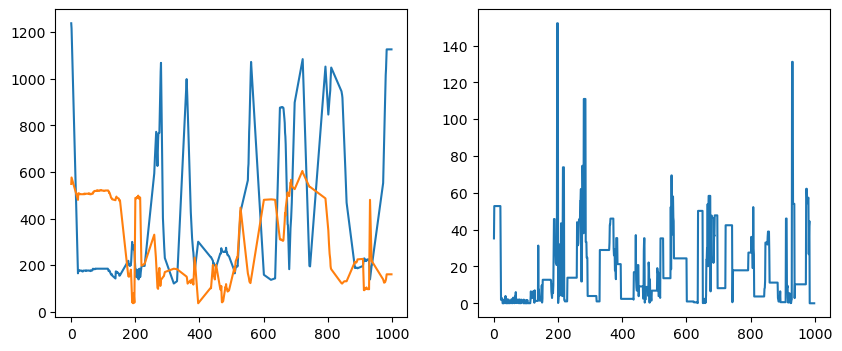

-44.93753248998691 26.980872762840956
197


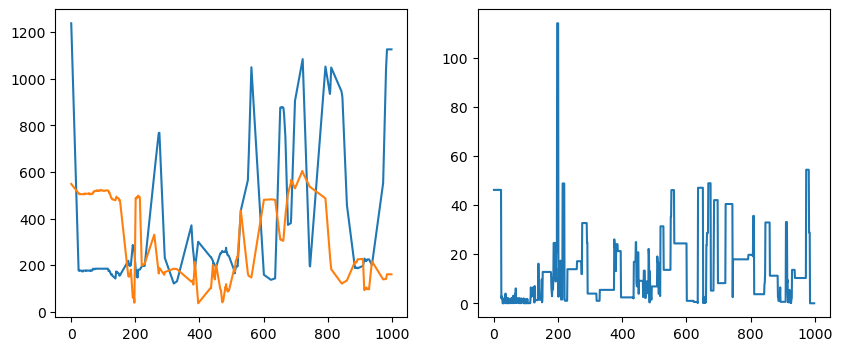

-32.06371770304852 20.14274546962942
194


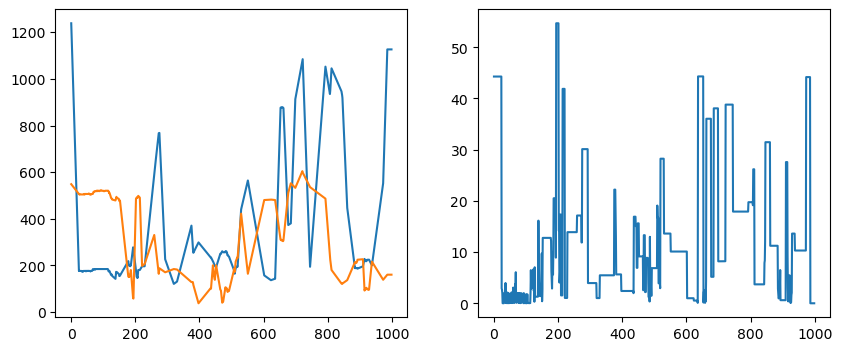

-26.83432839655603 17.47783152773535
198


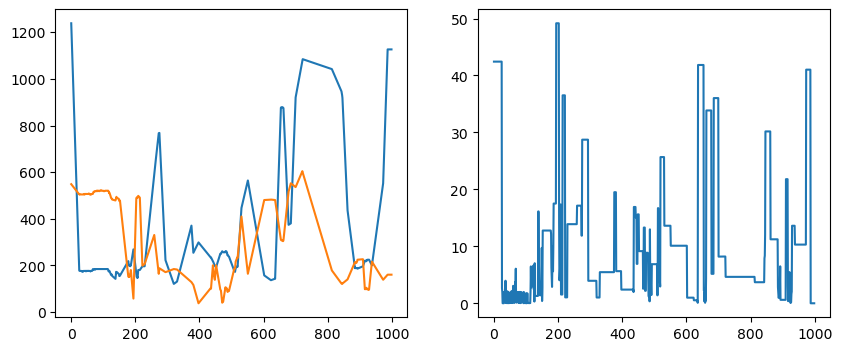

-25.186462724191927 15.702908176336157
5


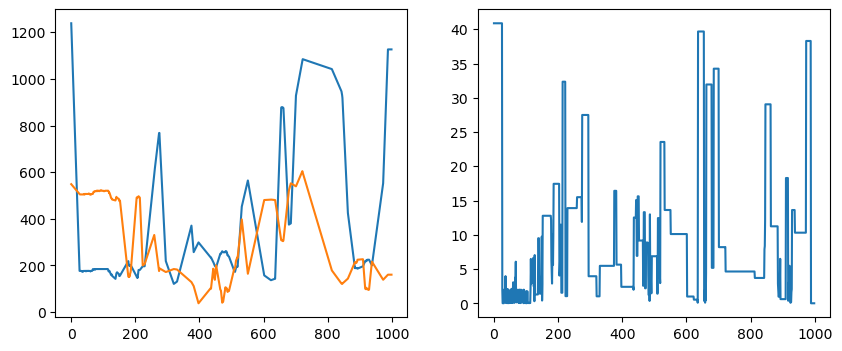

-22.521184161297235 14.558653525661713
1


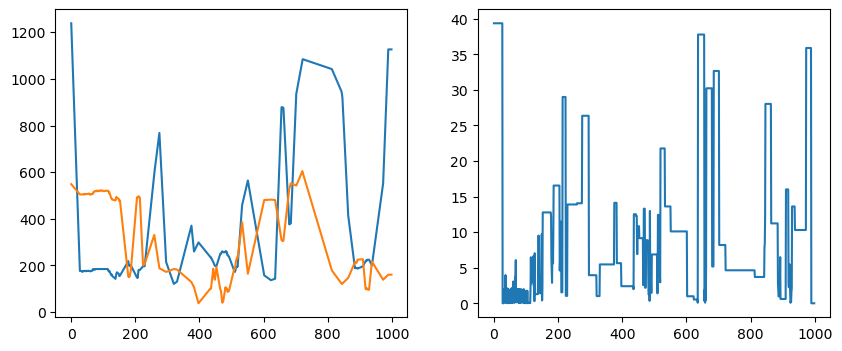

-21.345094262834316 14.118598571951658
27


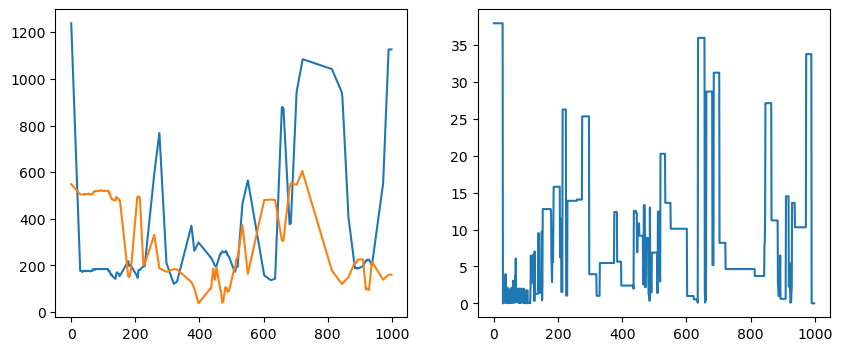

-20.26776390954406 13.737637412647203
28


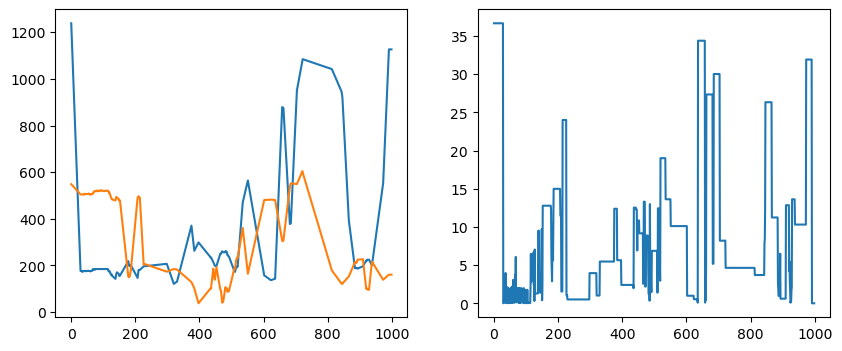

-20.52222694106661 13.019799658294247
4


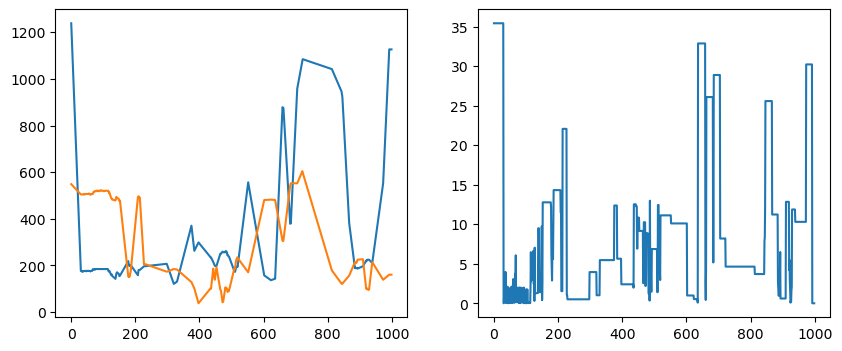

-19.595709411195124 12.576947423327063
1


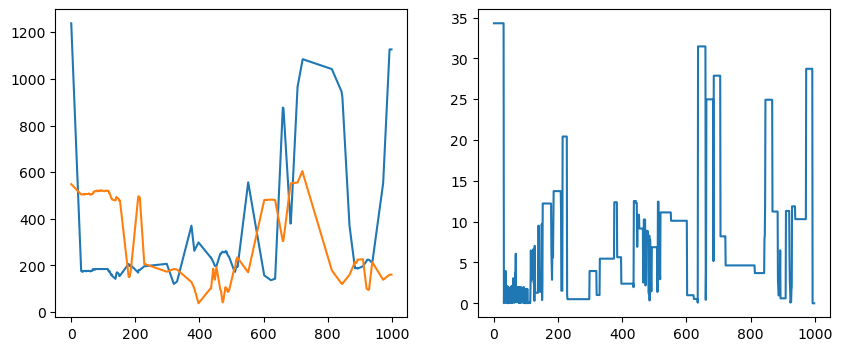

-18.822497908211712 12.289045096883427
0


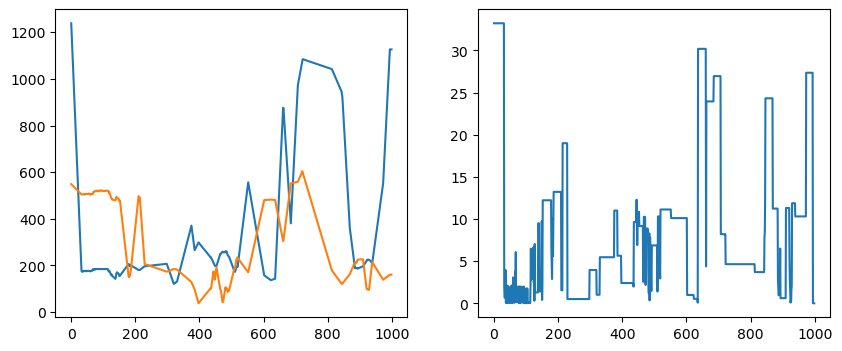

-18.10577622579378 12.018407979889261
0


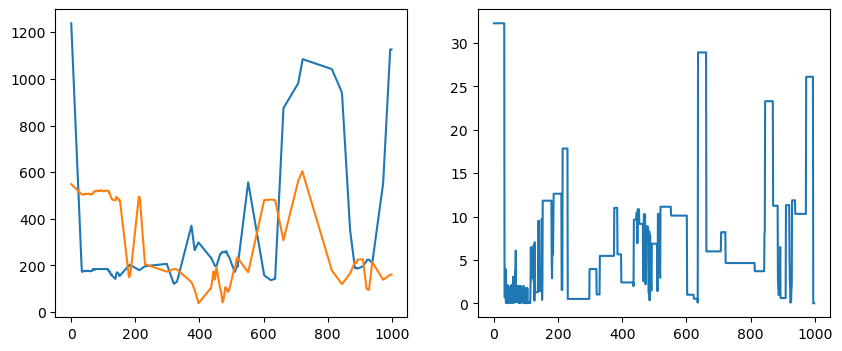

-16.17257466546279 10.77828049963618
4


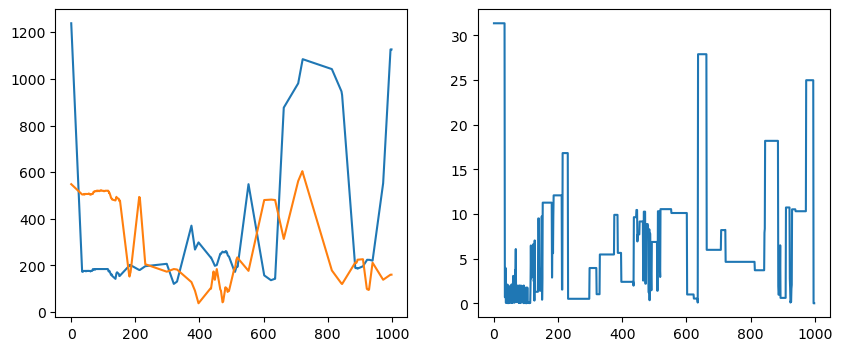

-15.314720104604772 10.437199747213194
0


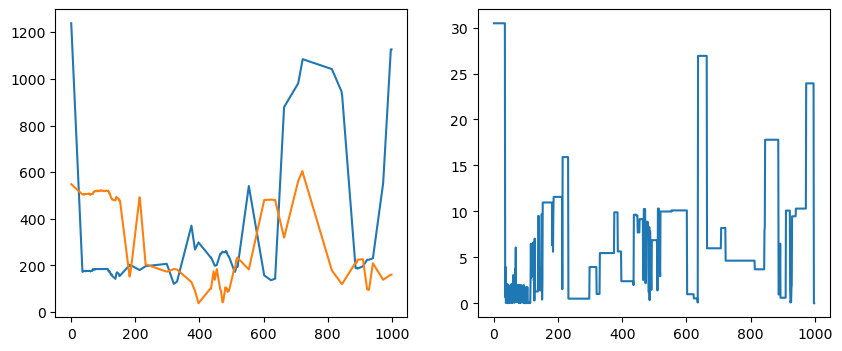

-14.752738483367498 10.222923703953056
2


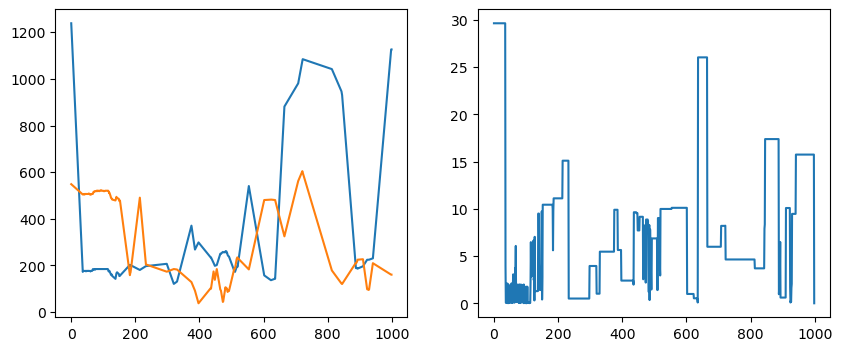

-13.731165622993137 9.861255780987944
0


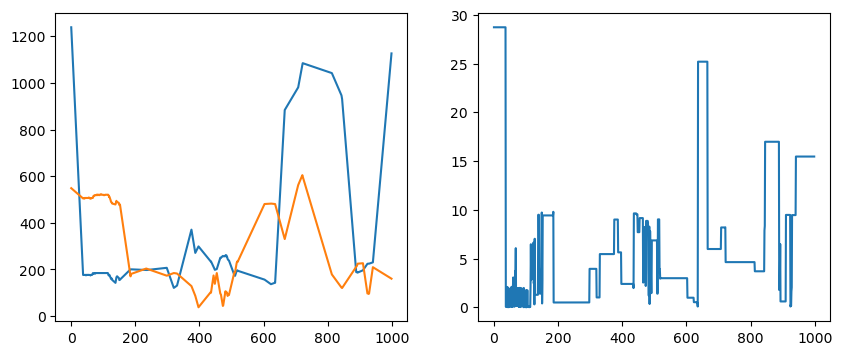

-14.775523735908823 9.403816614430019
5


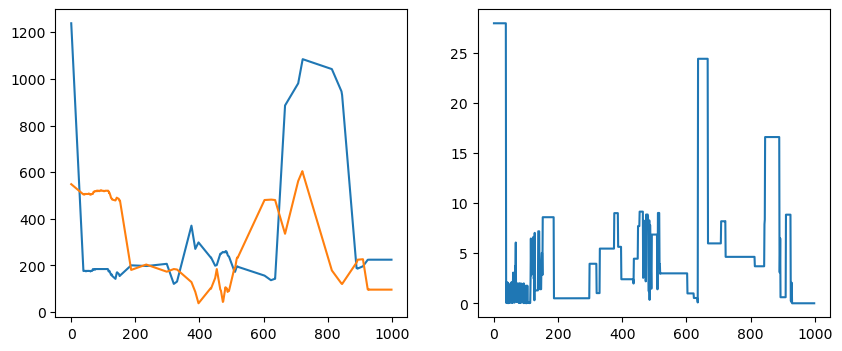

-14.907397151199852 8.70895825117852
5


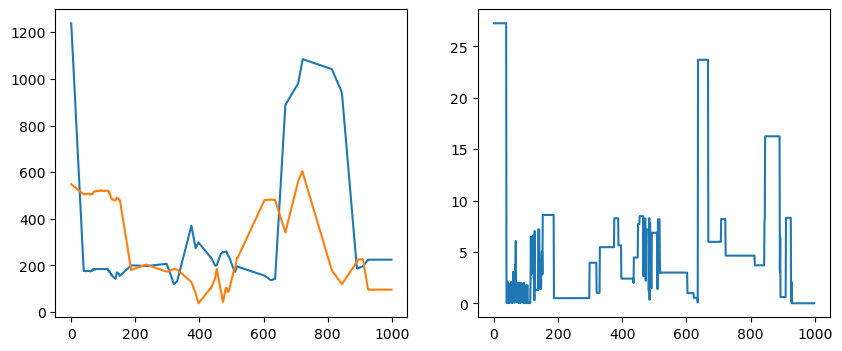

-14.545200669330544 8.572588141606163
0


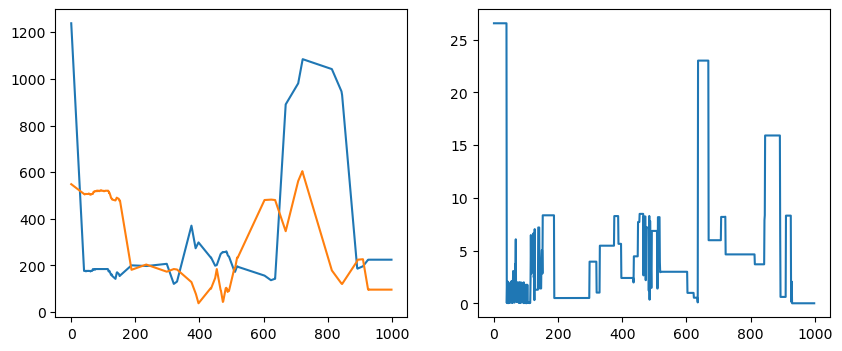

-14.220117792876561 8.456957482662217
0


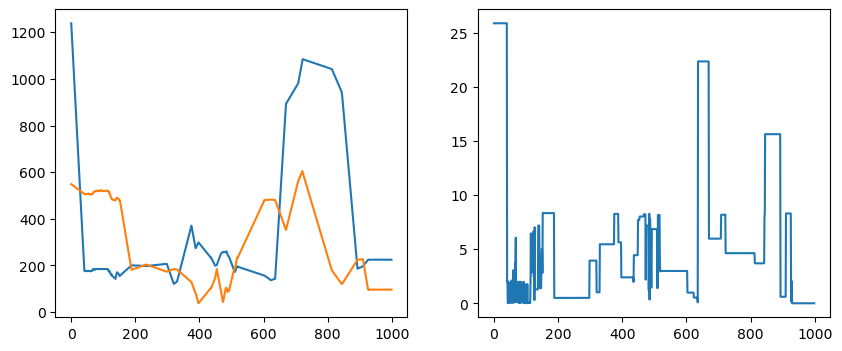

-13.926725149169684 8.353693510228823
2


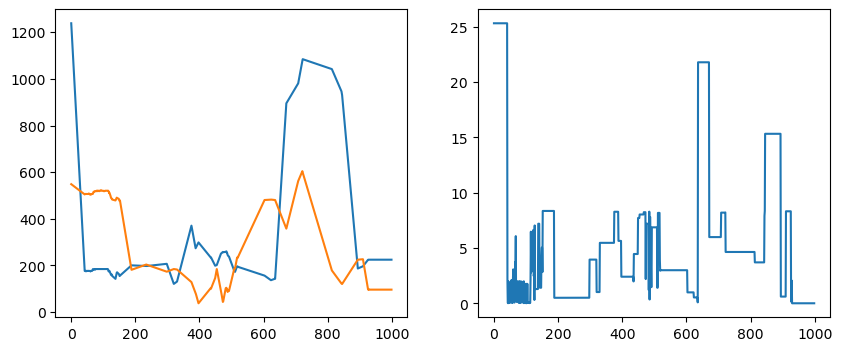

-13.63712272464703 8.252268226578167
5


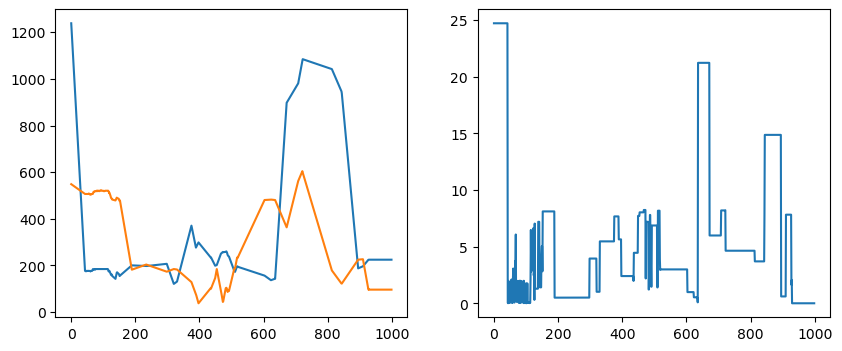

-13.299691549609433 8.128995400613782
1


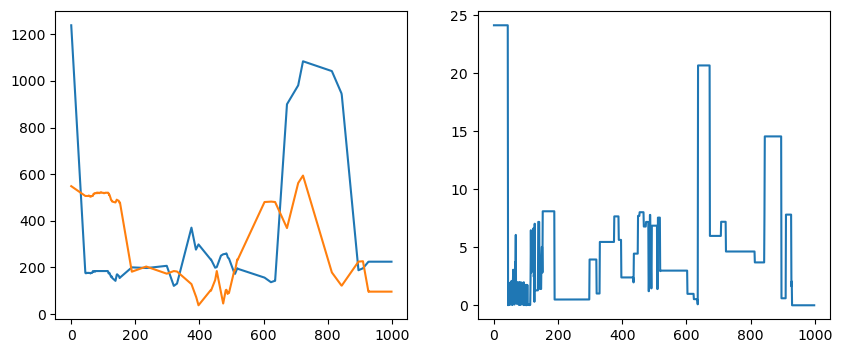

-13.008145222977543 8.01773099001913
2


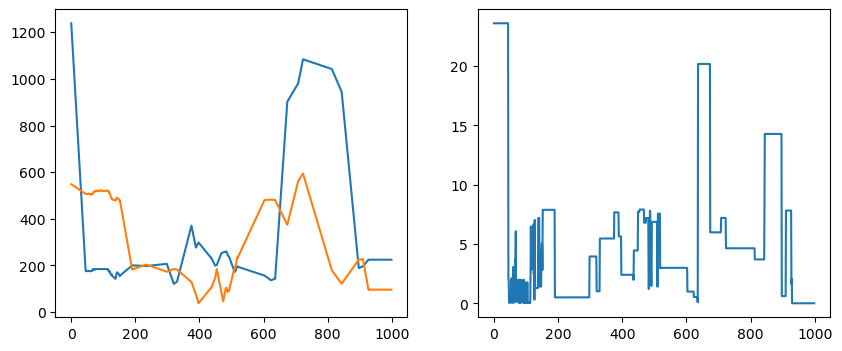

-12.723896176435254 7.918272423066074
9


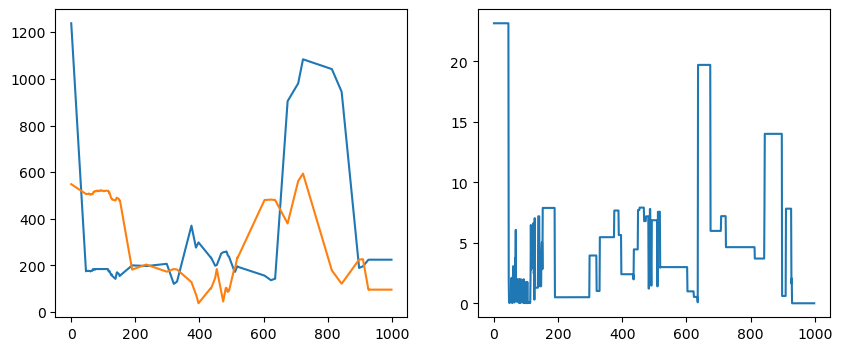

-12.484748505236034 7.8348155935844375
1


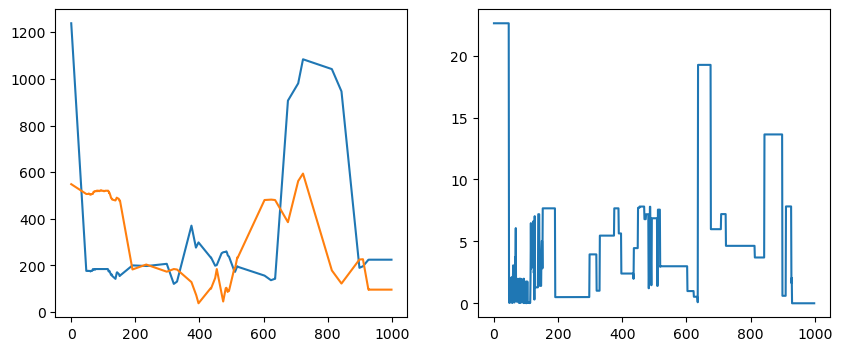

-12.200641416653518 7.7328474887240874
0


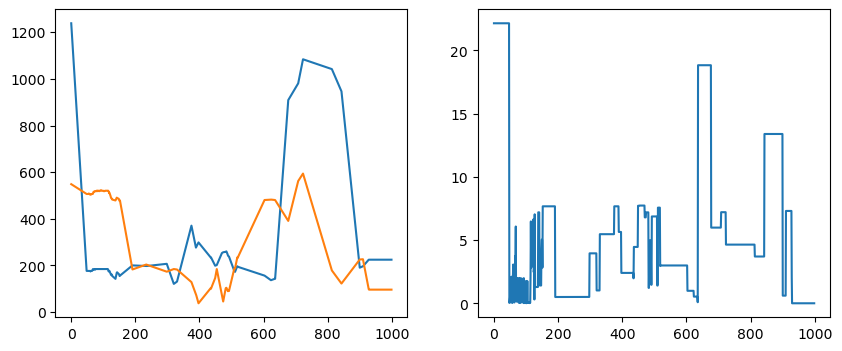

-11.948415942888293 7.639625115514182
0


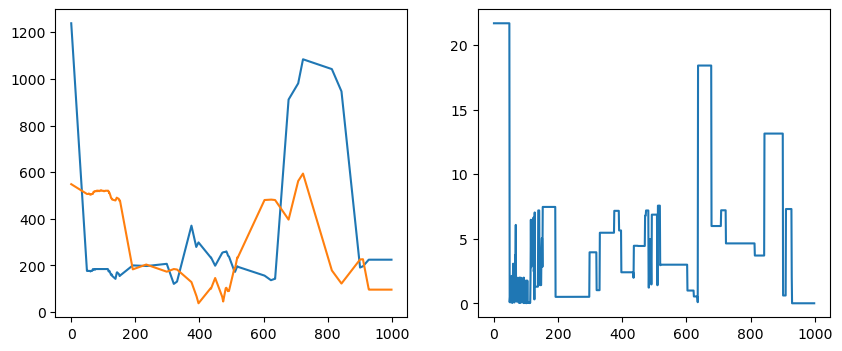

-11.745665460591553 7.516403807952581
0


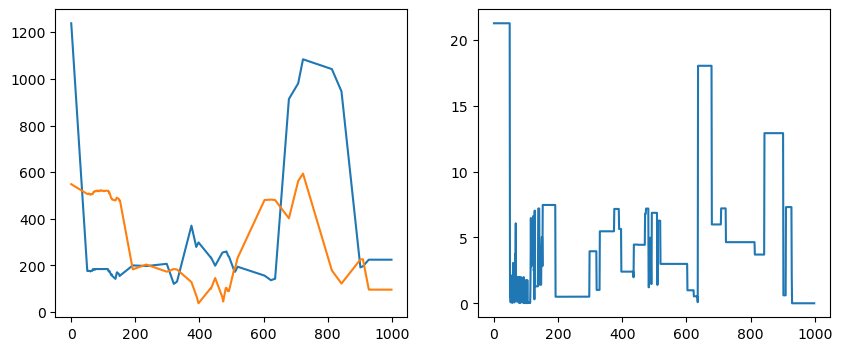

-11.51181838835236 7.430893231466546
2


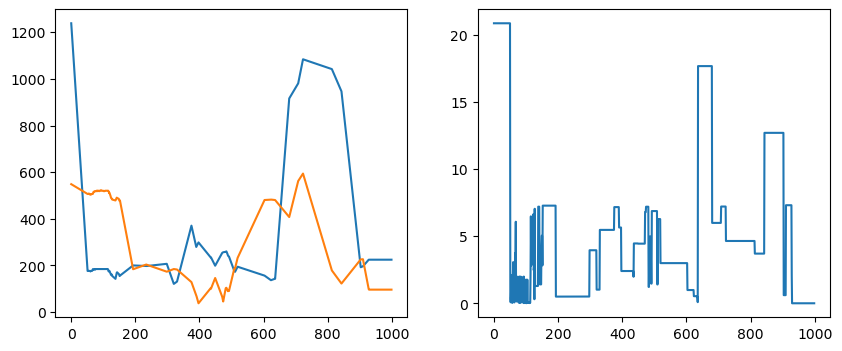

-11.280206412488173 7.349428506720593
3


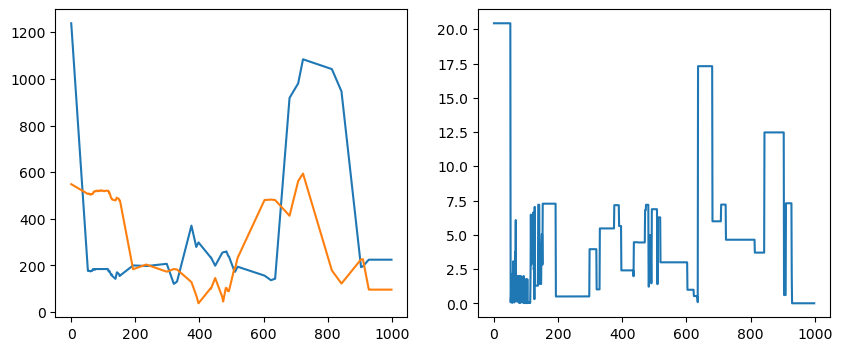

-11.061112565622235 7.272277264945853
1


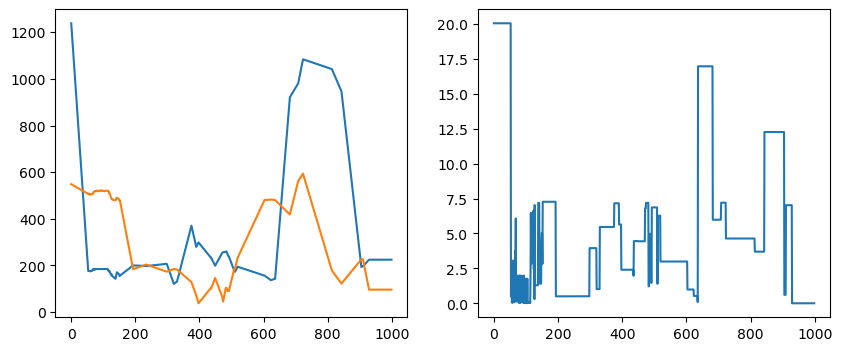

-10.842205282853978 7.195653486596584
20


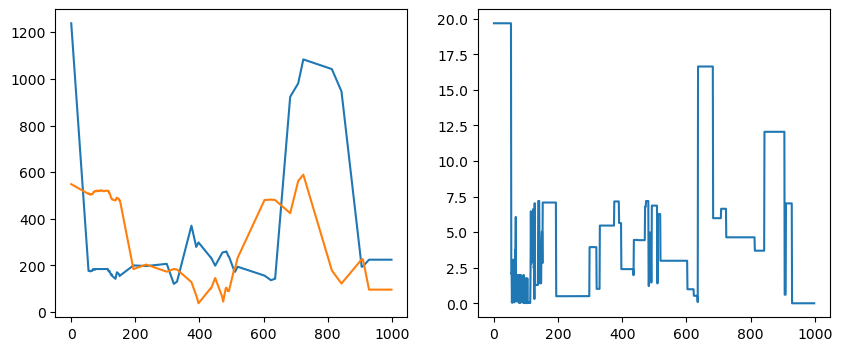

-10.628518858749842 7.1160016106673245
1


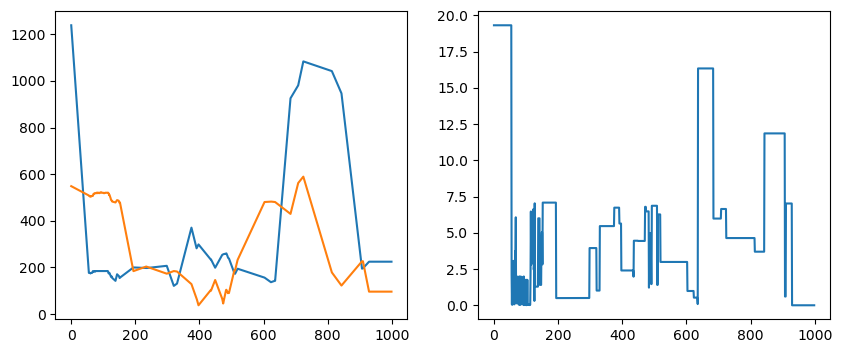

-10.419177441001526 7.036066207957567
1


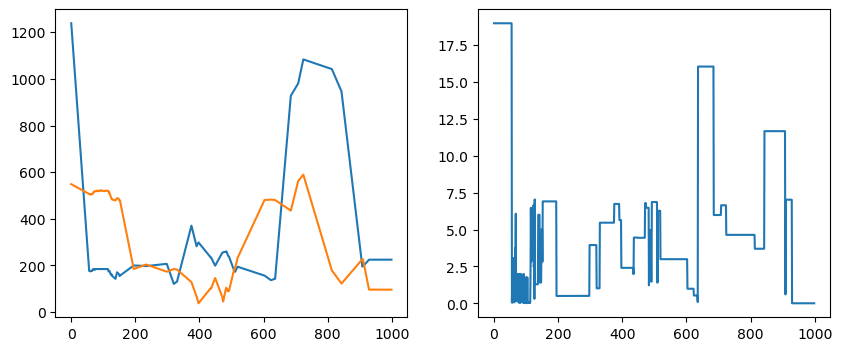

-10.222051775697425 6.965136492242095
1


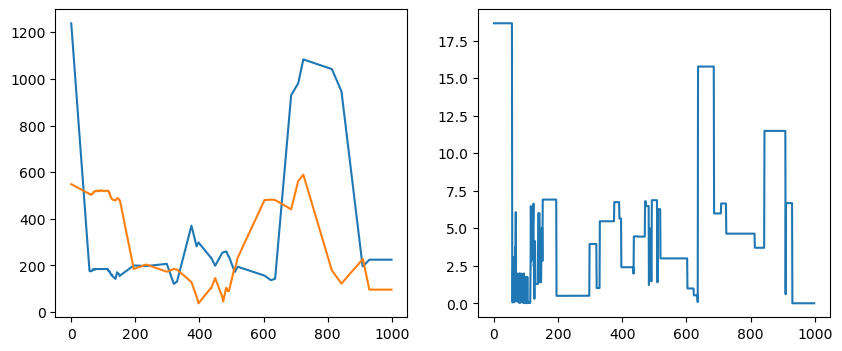

-10.013344749290503 6.892073603713605
0


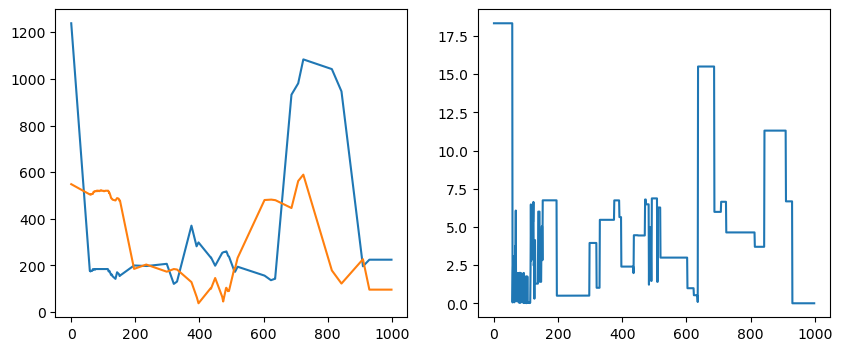

-9.823425925272389 6.823360470033535
4


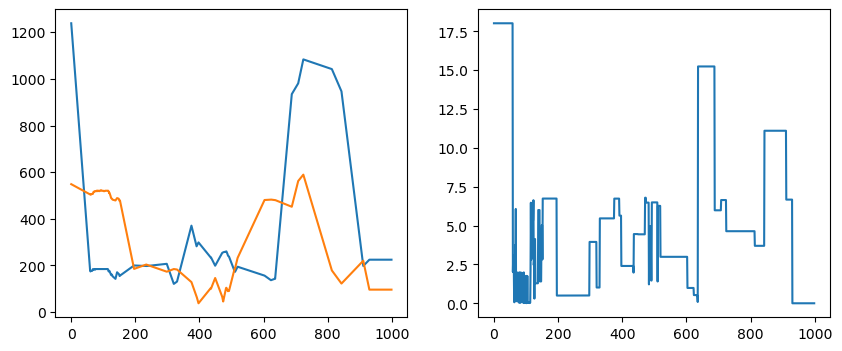

-9.642477494953667 6.753640103942243
4


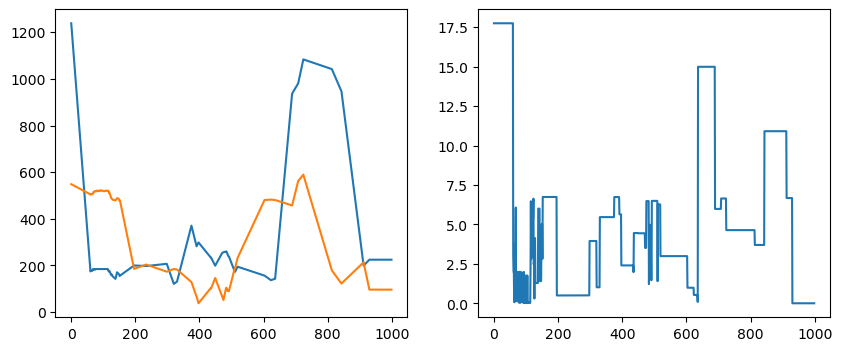

-9.50858306860757 6.691958731373461
9


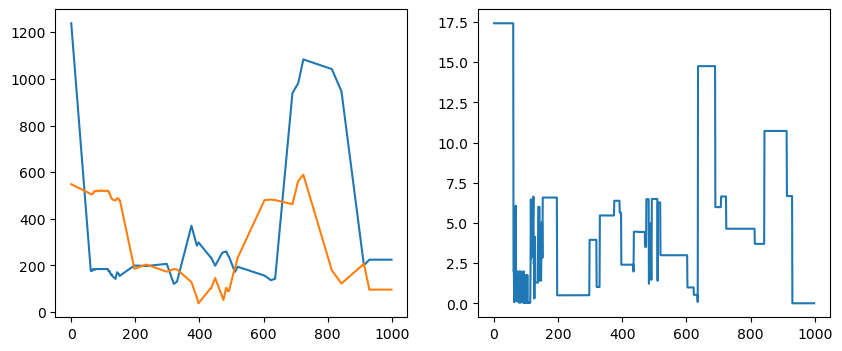

-9.328330464560544 6.615821519192541
2


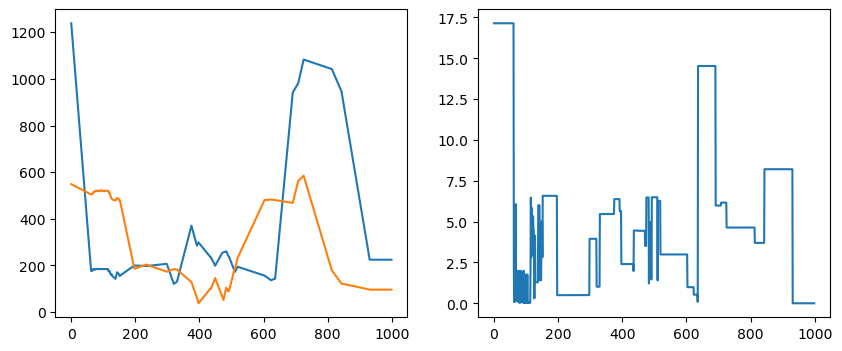

-8.89560034719209 6.368910427996943
5


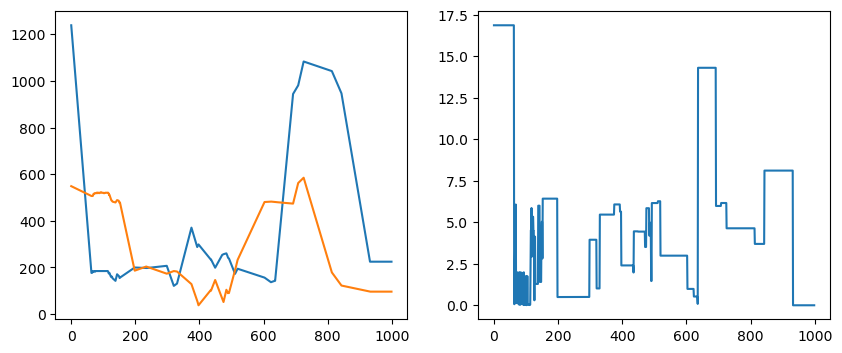

-8.717731372747894 6.300736564122434
0


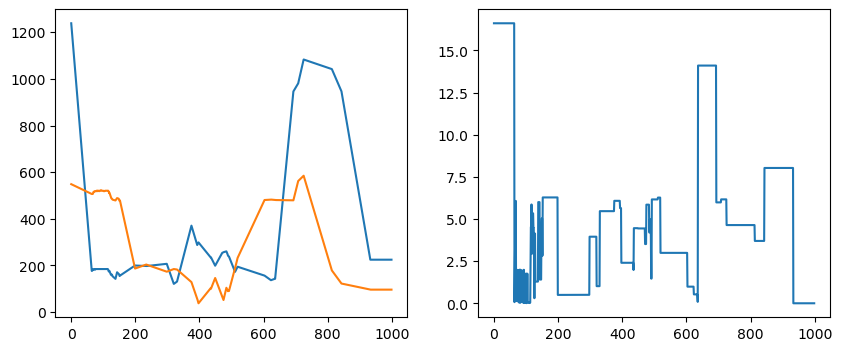

-8.55274430079901 6.24253466805305
0


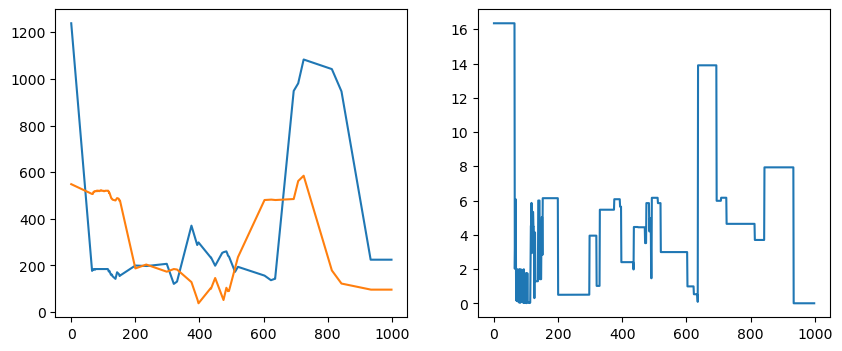

-8.388380469741104 6.184221240613218
4


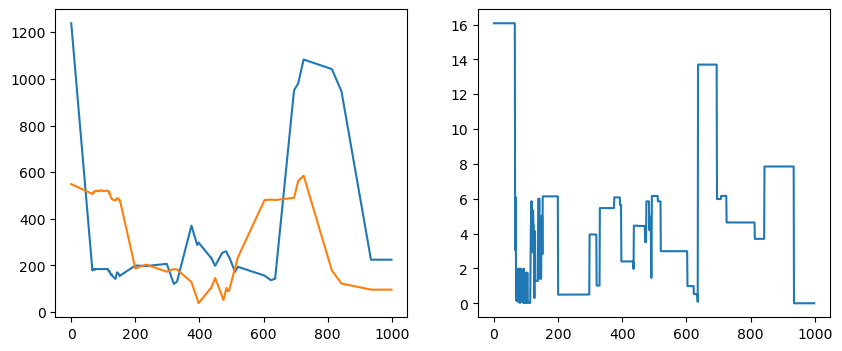

-8.235345030432873 6.128100760350485
5


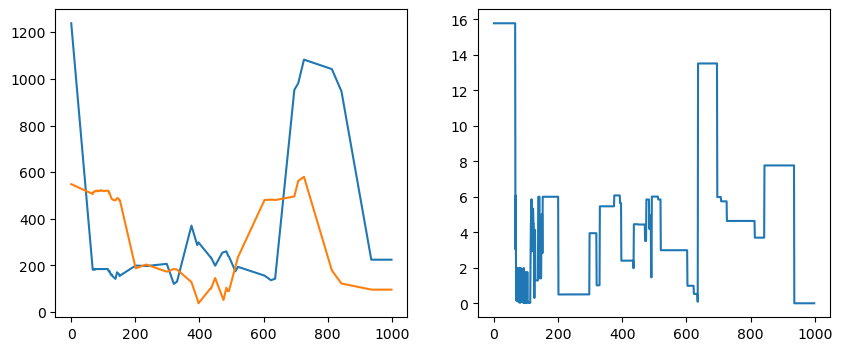

-8.071423305371273 6.0596401077995985
2


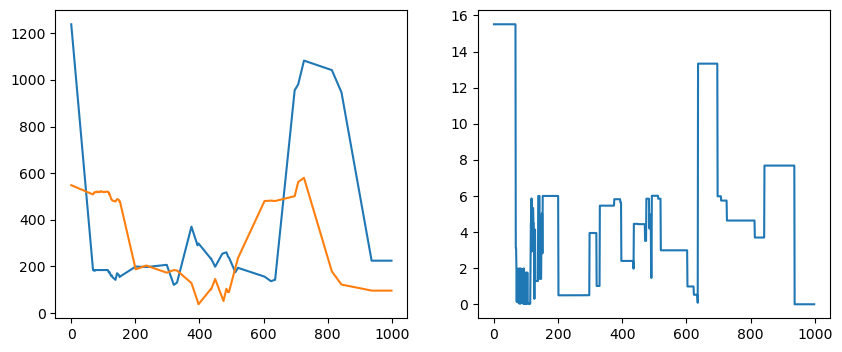

-7.922222040113821 6.0010525187848005
9


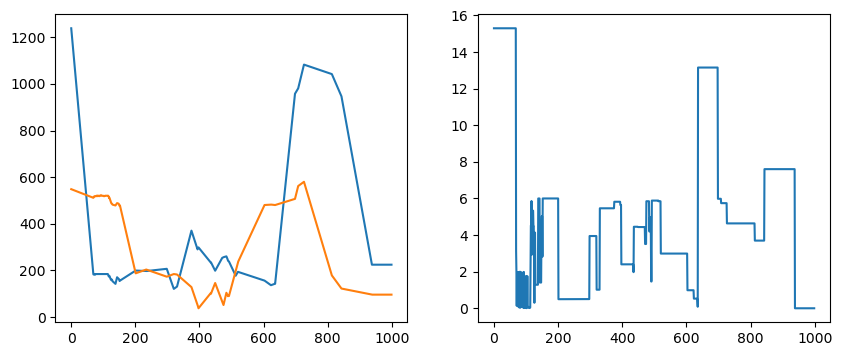

-7.801655314280637 5.955446356645265


In [16]:
new_locations = locations[:x, 1, :, 1]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(locations[:x, 1, 0, 1])
ax[0].plot(locations[:x, 1, 1, 1])
# print(new_locations)
vels = find_node_velocity(new_locations)
# print(vels)
ax[1].plot(vels)
plt.show()

for i in range(50):
    new_locations = fill_missing(new_locations)
    vels = find_node_velocity(new_locations)
    print(np.argmax(vels))
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(new_locations[:x, 0])
    ax[0].plot(new_locations[:x, 1])
    ax[1].plot(vels)
    plt.show()
    # replace outliers in locations with nan
    mean, std, low, high = get_stats(vels)
    high = high / 3
    nan_index = [i for i in range(len(vels)) if (vels[i] > high or vels[i] < low)]
    print(low, high) # this doesn't seems like a tight enough bound... 
    for index in nan_index:
        new_locations[index + 1, 0], new_locations[index + 1, 1] = np.nan, np.nan
    # keeps flattening but at some points is completely flattening out everything... need to find the sweet spot
    # also still want to quantify how big of a problem track switching is...!

    # at some point, will just have to nan out values permentalty if the jump is too big me thinks??

In [48]:
new_locations = fill_missing(locations[:20, 1, :, :])
new_locations.shape

(20, 2, 2)

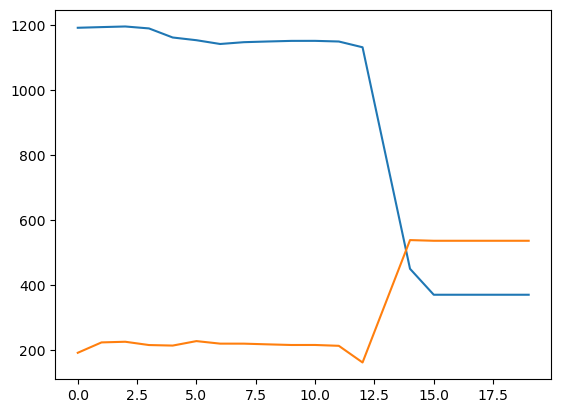

In [51]:

plt.plot(new_locations[:20, 0, 0])
plt.plot(new_locations[:20, 1, 0])
vels = find_node_velocity(new_locations)


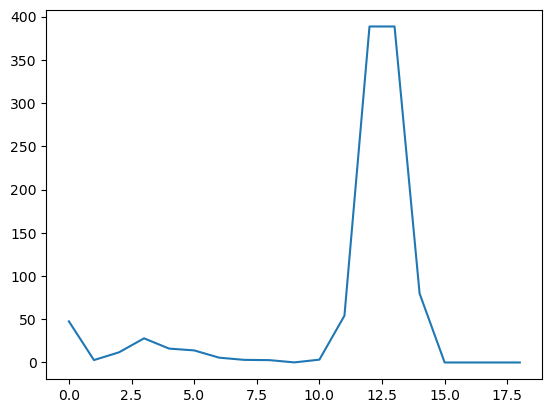

In [52]:
plt.plot(vels) # fill in and then do veloicty thing again...? to identify track switching??

In [43]:
x = 100
rat = 1

In [44]:
vels = np.zeros((x, x))
for i in range(x): 
    for j in range(x):
        p1 = locations[i, 1, :, rat]
        p2 = locations[j, 1, :, rat]
        dist = np.sqrt(np.sum((locations[i, 1, :, rat] - locations[j, 1, :, rat]) ** 2))
        vel = dist / np.abs(i - j) if (i-j) != 0 else 0
        vels[i,j] = vel

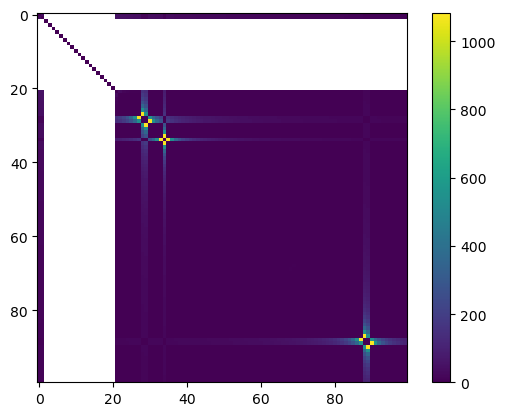

In [45]:
# Create the heatmap using Matplotlib
plt.imshow(vels, cmap='viridis', interpolation='nearest')

# Add a colorbar for reference
plt.colorbar()

# Show the plot
plt.show()

# If using Seaborn:
# import seaborn as sns
# sns.heatmap(graph_matrix, annot=True, cmap='viridis') #annot=True displays the values in each cell


13
1
777.0319539517008
777.0319539517008


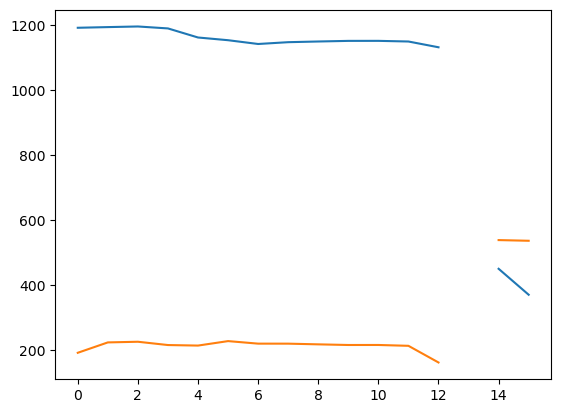

In [30]:
plt.plot(locations[:20, 1, 0, 0])
plt.plot(locations[:20, 1, 1, 0])
for i in range(14):
    if np.sum(np.isnan(locations[i, 1, :, 0])) == 2:
        temp = 1
        print(i)
        while(np.sum(np.isnan(locations[i+temp, 1, :, 0])) == 2):
            temp += 1
        print(temp)
        next_pos = locations[i+temp, 1, :, 0]
        dist = np.sqrt(np.sum((locations[i-1, 1, :, 0] - locations[i+temp, 1, :, 0]) ** 2))
        vel = dist / temp
        if vel > 700:
            
        print(vel)

In [17]:
from utils import find_node_vel_nan

In [18]:
x = locations[:20, 1, :,  0]
print(x)

[[1190.53759766  192.63169861]
 [1192.59436035  224.48339844]
 [1194.51074219  226.51222229]
 [1188.54516602  216.40431213]
 [1160.67602539  214.76574707]
 [1152.34484863  228.49487305]
 [1140.74169922  220.71456909]
 [1146.28723145  220.65724182]
 [1148.41088867  218.51849365]
 [1150.2833252   216.55662537]
 [1150.37268066  216.60726929]
 [1148.35913086  214.02980042]
 [1130.6550293   162.87265015]
 [          nan           nan]
 [ 450.52911377  538.64837646]
 [ 370.83575439  536.559021  ]
 [          nan           nan]
 [          nan           nan]
 [          nan           nan]
 [          nan           nan]]


In [89]:
def track_switching(node_locs):
    for j in range(node_locs.shape[0]): 
        for k in range(len(node_locs[j])):
            if np.isnan(node_locs[j, k]):
                start = 1
                temp = node_locs[j-start, k]
                while np.isnan(temp):
                    start += 1
                    temp = node_locs[j-start, k]
                node_locs[j][k] = temp
    vels = np.zeros((node_locs.shape[0] - 1))
    print(node_locs)
    num_stab = 1**-20
    for j in range(node_locs.shape[0] - 1):
        vel_temp = np.sqrt(np.sum(np.square(node_locs[j] - node_locs[j+1])))
        vels[j] = vel_temp
    # anything that nan is changed to 0 to make my life easier
    # vels = [0 if np.isnan(x) else x for x in vels]
    return vels

In [91]:
temp_vels = track_switching(locations[:, 1, :,  0])

[[1190.53759766  192.63169861]
 [1192.59436035  224.48339844]
 [1194.51074219  226.51222229]
 ...
 [1216.36035156  150.53274536]
 [1216.43713379  150.49815369]
 [1214.4909668   152.62242126]]


In [88]:
temp_vels[13]
locations[15, 1, :,  0]

array([370.83575439, 536.559021  ])

47.31551134253235 165.75421332871474 -449.94712864361185 544.5781513286765


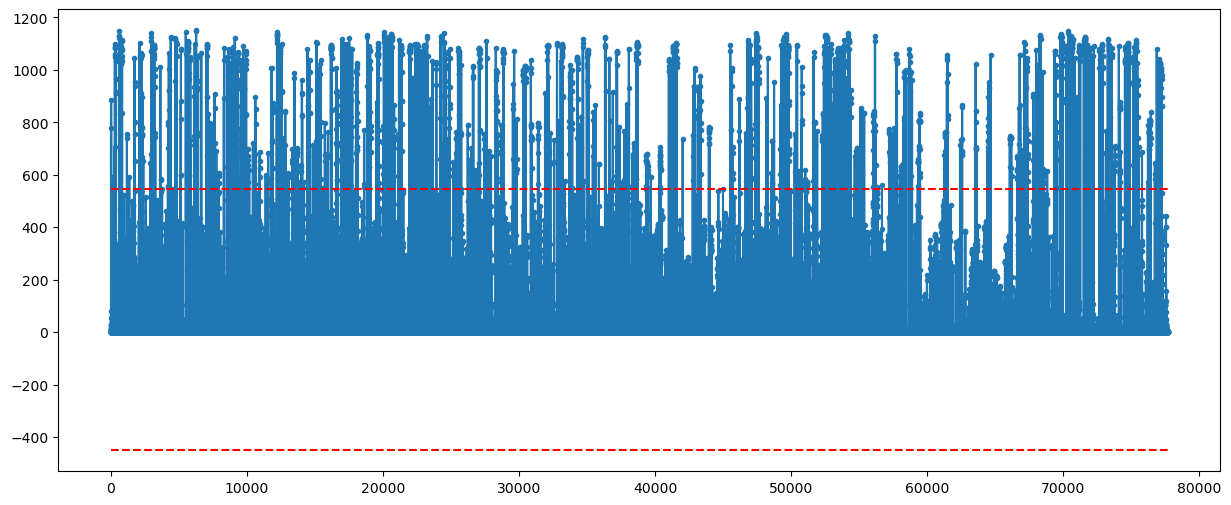

In [92]:
graph_vels(temp_vels, check=True)

In [47]:
def find_node_vel_nan(node_locs):
    nan_check = np.isnan(node_locs)
    nan_check = np.sum(nan_check, axis=1)
    rtd = np.where(nan_check == 2)
    node_locs = np.delete(node_locs, rtd[0], axis=0)
    # node_locs = np.delete(node_locs, np.where(np.sum(np.isnan(node_locs)) == 2)[0])
    vels = np.zeros((node_locs.shape[0] - 1))
    num_stab = 1**-20
    for j in range(node_locs.shape[0] - 1):
        vel_temp = np.sqrt(np.sum(np.square(node_locs[j] - node_locs[j+1])))
        vels[j] = vel_temp
    # anything that nan is changed to 0 to make my life easier
    vels = [0 if np.isnan(x) else x for x in vels]
    return vels

In [48]:
temp_vels = find_node_vel_nan(locations[:20, 1, :,  0])

73.56603493462339 196.3509488215639 -515.4868115300683 662.6188813993151


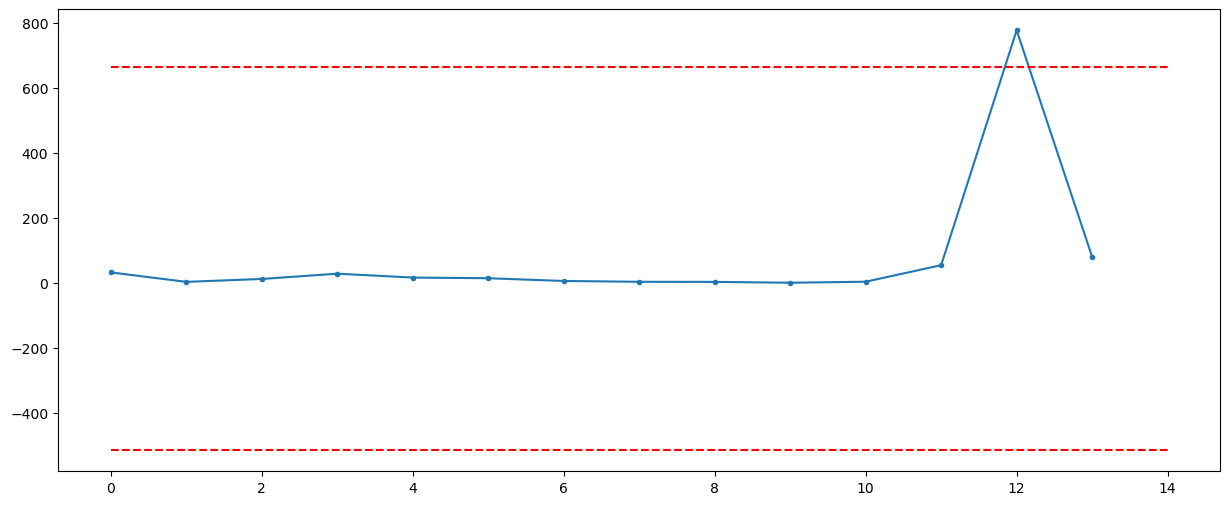

In [50]:
graph_vels(temp_vels, check=True)

In [46]:
node_locs = np.delete(x, np.where(np.sum(np.isnan(x)) == 2)[0]).reshape(20, 2)
# arr = np.delete(arr, rows_to_delete, axis=0)
# delete the rows where np.isnan sums to 2??
temp = np.isnan(node_locs)
truth = np.sum(temp, axis=1)
rtd = np.where(truth == 2)
temp2 = np.delete(node_locs, rtd[0], axis=0)
print(temp2)
print(len(rtd[0]) + len(temp2))

[[1190.53759766  192.63169861]
 [1192.59436035  224.48339844]
 [1194.51074219  226.51222229]
 [1188.54516602  216.40431213]
 [1160.67602539  214.76574707]
 [1152.34484863  228.49487305]
 [1140.74169922  220.71456909]
 [1146.28723145  220.65724182]
 [1148.41088867  218.51849365]
 [1150.2833252   216.55662537]
 [1150.37268066  216.60726929]
 [1148.35913086  214.02980042]
 [1130.6550293   162.87265015]
 [ 450.52911377  538.64837646]
 [ 370.83575439  536.559021  ]]
20


/tmp/ipykernel_952714/1048559101.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  node_locs = np.delete(x, np.where(np.sum(np.isnan(x)) == 2)[0]).reshape(20, 2)


In [34]:
node_locs

array([[1190.53759766,  192.63169861],
       [1192.59436035,  224.48339844],
       [1194.51074219,  226.51222229],
       [1188.54516602,  216.40431213],
       [1160.67602539,  214.76574707],
       [1152.34484863,  228.49487305],
       [1140.74169922,  220.71456909],
       [1146.28723145,  220.65724182],
       [1148.41088867,  218.51849365],
       [1150.2833252 ,  216.55662537],
       [1150.37268066,  216.60726929],
       [1148.35913086,  214.02980042],
       [1130.6550293 ,  162.87265015],
       [          nan,           nan],
       [ 450.52911377,  538.64837646],
       [ 370.83575439,  536.559021  ],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan]])

In [19]:
locations[:20, 1, :, 0] # 13, 16, 17, 18, 19

array([[1190.53759766,  192.63169861],
       [1192.59436035,  224.48339844],
       [1194.51074219,  226.51222229],
       [1188.54516602,  216.40431213],
       [1160.67602539,  214.76574707],
       [1152.34484863,  228.49487305],
       [1140.74169922,  220.71456909],
       [1146.28723145,  220.65724182],
       [1148.41088867,  218.51849365],
       [1150.2833252 ,  216.55662537],
       [1150.37268066,  216.60726929],
       [1148.35913086,  214.02980042],
       [1130.6550293 ,  162.87265015],
       [          nan,           nan],
       [ 450.52911377,  538.64837646],
       [ 370.83575439,  536.559021  ],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan]])

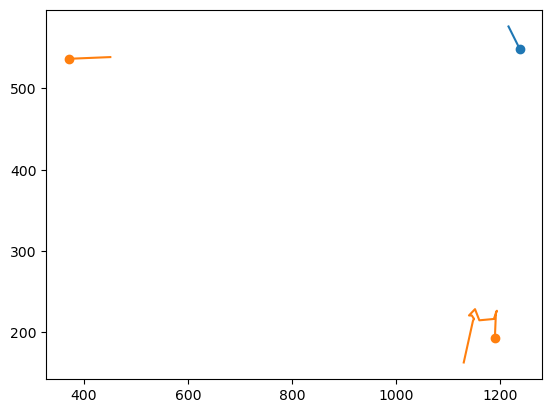

In [27]:
plt.plot(locations[:20, 1, 0, 0], locations[:20, 1, 1, 0], 'tab:orange')
plt.plot(locations[:20, 1, 0, 1], locations[:20, 1, 1, 1], 'tab:blue')
plt.plot([locations[0, 1, 0, 1], locations[19, 1, 0, 1]], [locations[0, 1, 1, 1], locations[19, 1, 1, 1]], 'o')
plt.plot([locations[0, 1, 0, 0], locations[15, 1, 0, 0]], [locations[0, 1, 1, 0], locations[15
                                                           , 1, 1, 0]], 'o')


In [25]:
# locations[:20, :, :, 0]
for i in range(20):
    if np.sum(np.isnan(locations[i, :, :, 0])) == 10:
        print(i)

13
16
17
18
19


In [42]:
print(locations[:20, :, :, 1])
for i in range(20):
    if np.sum(np.isnan(locations[i, :, :, 1])) == 10:
        print(i)

[[[1200.55541992  580.54101562]
  [1238.53503418  548.55871582]
  [1206.53588867  536.55310059]
  [1224.53308105  540.5322876 ]
  [1152.55493164  446.56781006]]

 [[1190.81958008  594.28521729]
  [1216.80969238  576.31347656]
  [1182.84130859  558.29571533]
  [1208.81274414  560.29626465]
  [1156.83251953  446.28323364]]

 [[          nan           nan]
  [          nan           nan]
  [          nan           nan]
  [          nan           nan]
  [          nan           nan]]

 [[          nan           nan]
  [          nan           nan]
  [          nan           nan]
  [          nan           nan]
  [          nan           nan]]

 [[          nan           nan]
  [          nan           nan]
  [          nan           nan]
  [          nan           nan]
  [          nan           nan]]

 [[          nan           nan]
  [          nan           nan]
  [          nan           nan]
  [          nan           nan]
  [          nan           nan]]

 [[          nan           n

In [18]:
intial = nan_vals(locations[:50, :, :, :])

In [19]:
intial

37.4

In [17]:
all_vels[node] = find_node_velocity(locations[:50, node, :,  rat:rat+1])

# get values need to find outliers
mean, std, low, high = get_stats(all_vels[node])

# if you want to check that these values looks good
graph_vels(all_vels[node], False)

# replace outliers in locations with nan
nan_index = [i for i in range(len(all_vels[node])) if (all_vels[node][i] > high or all_vels[node][i] < low)]
for index in nan_index:
    locations[index + 1, node, 0, rat], locations[index + 1, node, 0, rat] = np.nan, np.nan

In [ ]:
plt.plot(locations[:50, 1, 0, 0], locations[:50, 1, 1, 0])
plt.plot(locations[:50, 1, 0, 1], locations[:50, 1, 1, 1])

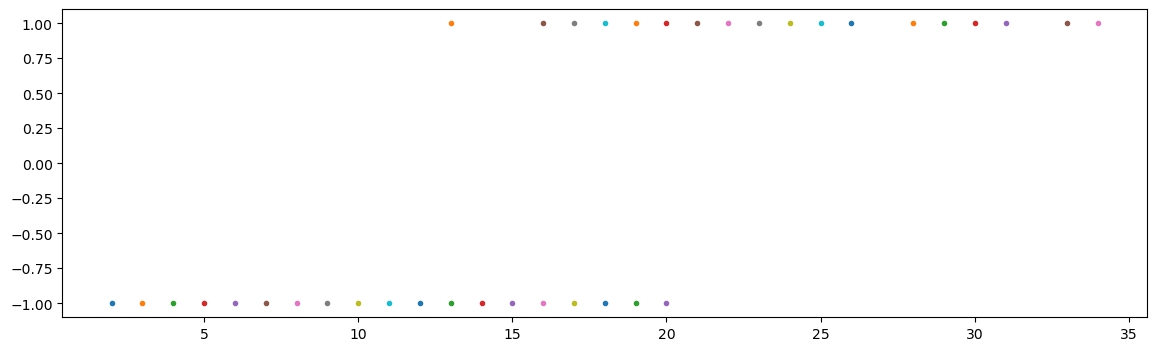

In [89]:
inst3 = []
inst4 = []
plt.figure(figsize=(14, 4))
for i in range(50): # range(locations.shape[0]):
    if np.sum(np.isnan(locations[i, :, :, 0])) == 10:
        inst3.append(i)
        plt.plot(i, 1, '.')
    if np.sum(np.isnan(locations[i, :, :, 1])) == 10:
        inst4.append(i)
        plt.plot(i, -1, '.')

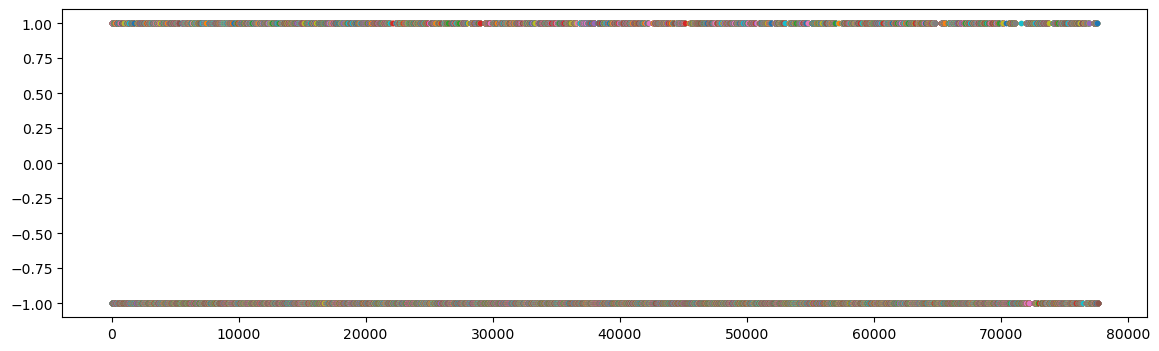

In [80]:
inst1 = []
inst2 = []
plt.figure(figsize=(14, 4))
for i in range(locations.shape[0]):
    if np.sum(np.isnan(locations[i, :, :, 0])) == 10:
        inst1.append(i)
        plt.plot(i, 1, '.')
    if np.sum(np.isnan(locations[i, :, :, 1])) == 10:
        inst2.append(i)
        plt.plot(i, -1, '.')

In [76]:
print(locations[31210, :, :, 0])
# all(x.all() == np.nan for x in locations[31210, :, :, 0])
print(locations[31210, :, :, 0].flatten())
np.isnan(locations[31210, :, :, 0])

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[nan nan nan nan nan nan nan nan nan nan]


array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [48]:
for i in range(20):
    print(locations[31210+i, :, :, 1])

[[1276.5045166   446.56744385]
 [1250.49584961  434.59014893]
 [1264.48120117  464.55584717]
 [1244.50622559  458.59069824]
 [1108.50158691  548.55737305]]
[[1278.44543457  448.60455322]
 [1250.45788574  436.6015625 ]
 [1264.43359375  466.58044434]
 [1244.45861816  460.59655762]
 [1108.4440918   548.58789062]]
[[1276.55249023  448.60882568]
 [1250.5456543   436.59436035]
 [1264.51171875  466.59143066]
 [1244.54589844  460.60516357]
 [1108.54125977  548.60064697]]
[[1278.61730957  448.40979004]
 [1250.63232422  438.38934326]
 [1264.62023926  468.38690186]
 [1244.62695312  464.38781738]
 [1108.63659668  548.39239502]]
[[1276.50036621  446.35794067]
 [1250.50915527  436.38092041]
 [1264.50915527  466.35848999]
 [1244.52416992  462.39434814]
 [1108.49499512  548.36010742]]
[[1274.52807617  446.39282227]
 [1250.50732422  436.4276123 ]
 [1264.49401855  466.40344238]
 [1244.50866699  462.4362793 ]
 [1108.49377441  548.39520264]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[1274.4

In [49]:
for i in range(20):
    print(locations[31210+i, :, :, 0])

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[1274.58215332  444.45831299]
 [1248.57165527  436.45773315]
 [1264.55407715  464.45422363]
 [1244.56176758  462.45605469]
 [1108.5637207   548.43939209]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[1274.59106445  446.3706665 ]
 [1248.57666016  436.40551758]
 [1264.59753418  464.39123535]
 [1244.57373047  462.40560913]
 [1108.57641602  548.39593506]]
[[1274.54187012  444.44744873]
 [1248.54748535  436.44464111]
 [1266.53466797  462.45013428]
 [1244.53466797  462.45309448]
 [1110.52294922  548.44104004]]
[[1274.57556152  446.42852783]
 [1250.55725098  436.45233154]
 [1266.57006836  464.45153809]
 [1244.58093262  462.46218872]
 [1108.59619141 